In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',80)
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Sambhu\\Desktop\\Imarticus\\Class Material\\kaggle\\CO2 Emissions_Canada.csv')

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: flo

In [8]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [9]:
df.Make.value_counts()

FORD             577
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           276
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            164
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
JAGUAR           118
VOLVO            118
BUICK             92
INFINITI          87
LINCOLN           81
LAND ROVER        76
MITSUBISHI        73
RAM               72
CHRYSLER          64
FIAT              56
MASERATI          52
ACURA             51
ROLLS-ROYCE       48
ASTON MARTIN      39
LAMBORGHINI       37
BENTLEY           35
SCION             21
ALFA ROMEO        19
GENESIS           14
SMART              7
SRT                2
BUGATTI            2
Name: Make, dtype: int64

## Analysing top 10 brands and models

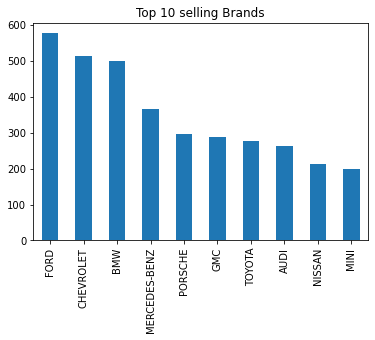

In [10]:
df['Make'].value_counts().head(10).plot(kind = 'bar')
plt.title("Top 10 selling Brands")
plt.show()

In [11]:
df['Model'].value_counts()

F-150 FFV             32
F-150 FFV 4X4         31
MUSTANG               27
FOCUS FFV             24
F-150 4X4             20
                      ..
LS 500                 1
LS 500h                1
NX 300 AWD F SPORT     1
RX 350 L AWD           1
XC40 T4 AWD            1
Name: Model, Length: 2053, dtype: int64

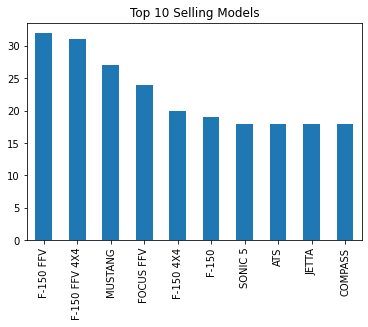

In [12]:
df['Model'].value_counts().head(10).plot(kind = 'bar')
plt.title('Top 10 Selling Models')
plt.show()

In [13]:
df_models = df[(df.Model == 'F-150 FFV 4X4')|(df.Model == 'F-150 FFV')|(df.Model == 'MUSTANG')|(df.Model == 'FOCUS FFV')|(df.Model == 'F-150')|(df.Model == 'SONIC 5')|(df.Model == 'ATS')|(df.Model == 'JETTA')|(df.Model == 'COMPASS')]

In [14]:
df_models.Make.value_counts()

FORD          133
CADILLAC       18
CHEVROLET      18
JEEP           18
VOLKSWAGEN     18
Name: Make, dtype: int64

In [15]:
df_models.Model[df_models.Make == 'FORD'].unique()

array(['F-150', 'F-150 FFV', 'F-150 FFV 4X4', 'FOCUS FFV', 'MUSTANG'],
      dtype=object)

In [16]:
# All the top 5 selling cars are from Ford

In [17]:
df_models['Vehicle Class'][df_models.Model == 'F-150'].unique()

array(['PICKUP TRUCK - STANDARD'], dtype=object)

In [18]:
df_models['Vehicle Class'][df_models.Model == 'F-150 FFV 4X4'].unique()

array(['PICKUP TRUCK - STANDARD'], dtype=object)

In [19]:
df_models['Vehicle Class'][df_models.Model == 'F-150 FFV'].unique()

array(['PICKUP TRUCK - STANDARD'], dtype=object)

In [20]:
df_models['Vehicle Class'][df_models.Model == 'FOCUS FFV'].unique()

array(['COMPACT'], dtype=object)

In [21]:
df_models['Vehicle Class'][df_models.Model == 'MUSTANG'].unique()

array(['SUBCOMPACT'], dtype=object)

In [22]:
# Most of the top selling vehicles are pick-up trucks by Ford

In [23]:
df['Vehicle Class'].value_counts()

SUV - SMALL                 1006
MID-SIZE                     983
COMPACT                      903
SUV - STANDARD               613
SUBCOMPACT                   533
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      475
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        214
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

In [24]:
# We can see pick-up truck sales is not the highest over all, So analysing the Co2 emission only by the top firms
# will not give clear picture.

# In terms of number of units FORD vehicles are in large number comapred to others it sales lot of pick-up trucks. Suprisingly
# no. of small SUV count is the highest which shows smaller companies contributes to highest number of Small SUVs

In [25]:
categorical_10 = ['Make', 'Model']

Make
CADILLAC       4097
CHEVROLET      3338
FORD          34756
JEEP           3997
VOLKSWAGEN     3470
Name: CO2 Emissions(g/km), dtype: int64


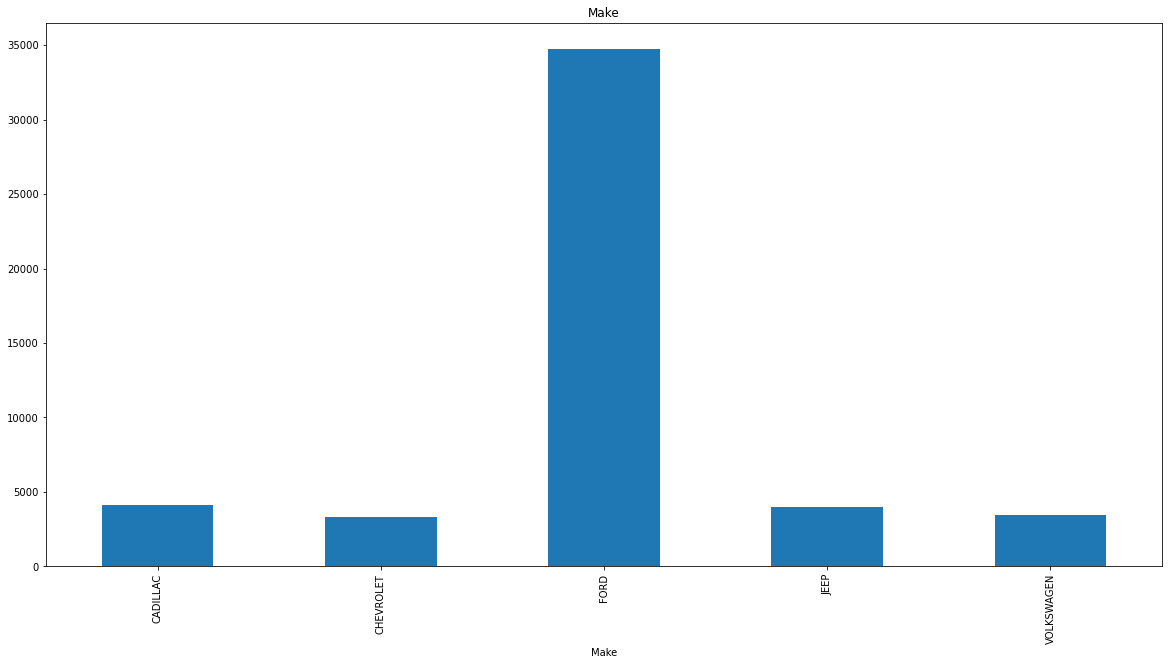

            count        mean        std    min    25%    50%     75%    max
Make                                                                        
CADILLAC     18.0  227.611111  13.182604  207.0  216.0  228.0  236.75  251.0
CHEVROLET    18.0  185.444444   7.830725  172.0  182.5  185.5  191.00  197.0
FORD        133.0  261.323308  47.761489  165.0  244.0  271.0  293.00  366.0
JEEP         18.0  222.055556   9.352396  209.0  214.5  218.5  229.50  238.0
VOLKSWAGEN   18.0  192.777778  13.601711  168.0  184.5  191.0  205.00  216.0


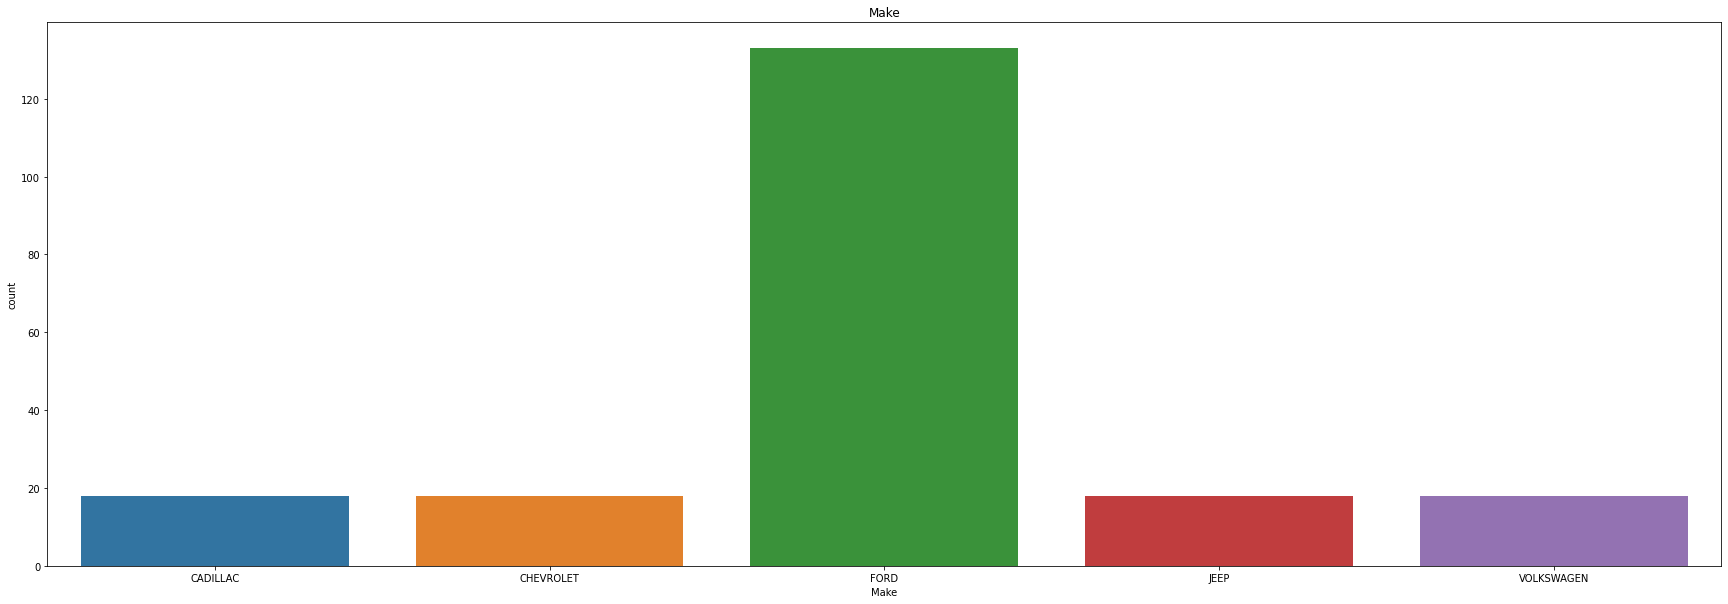

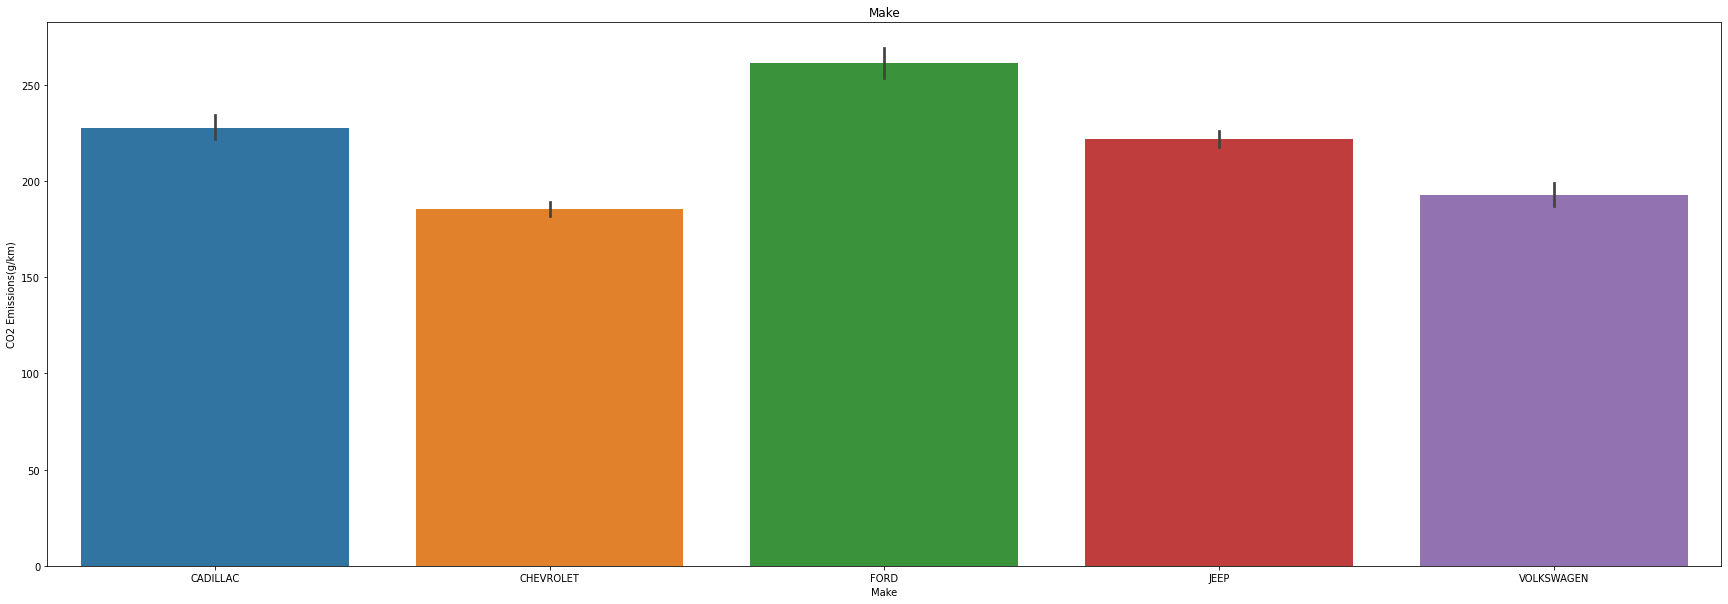

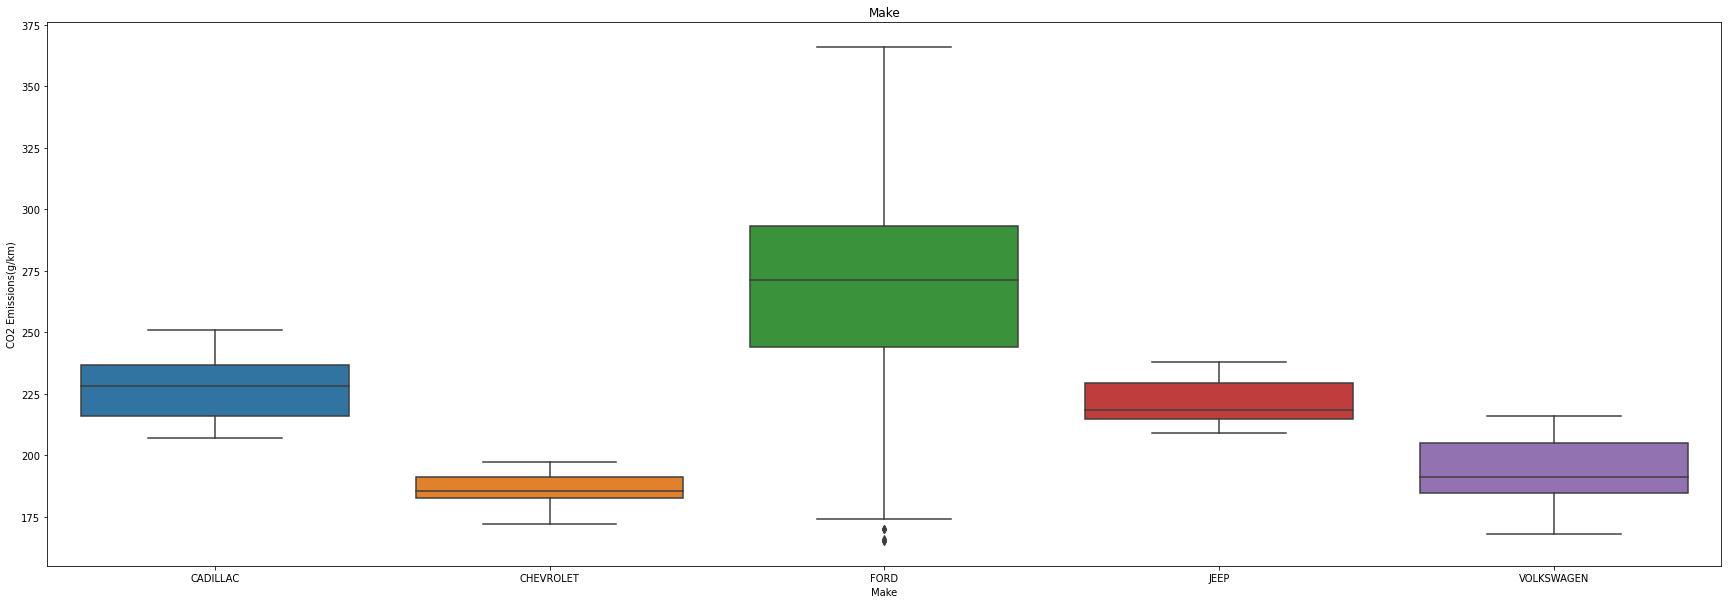

Model
ATS              4097
COMPASS          3997
F-150            5209
F-150 FFV        9016
F-150 FFV 4X4    9235
FOCUS FFV        4281
JETTA            3470
MUSTANG          7015
SONIC 5          3338
Name: CO2 Emissions(g/km), dtype: int64


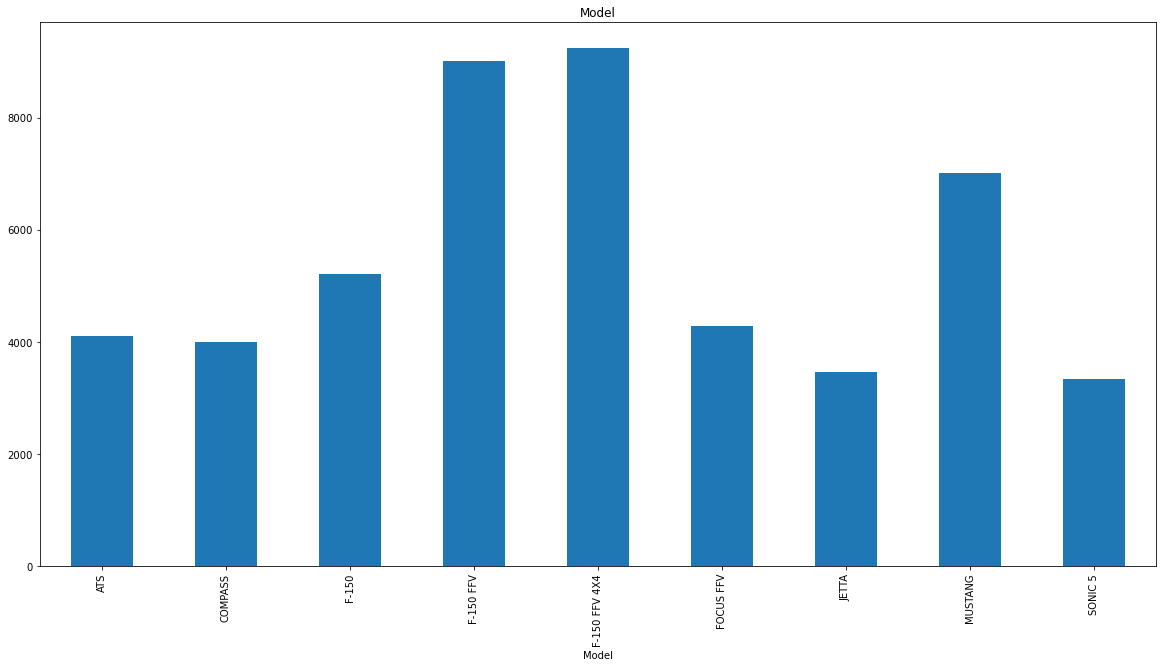

               count        mean        std    min     25%    50%     75%  \
Model                                                                       
ATS             18.0  227.611111  13.182604  207.0  216.00  228.0  236.75   
COMPASS         18.0  222.055556   9.352396  209.0  214.50  218.5  229.50   
F-150           19.0  274.157895  28.056022  248.0  256.00  264.0  287.00   
F-150 FFV       32.0  281.750000  25.252276  245.0  260.25  284.5  294.00   
F-150 FFV 4X4   31.0  297.903226  22.234140  263.0  279.50  299.0  314.50   
FOCUS FFV       24.0  178.375000   8.080102  165.0  173.00  178.5  184.25   
JETTA           18.0  192.777778  13.601711  168.0  184.50  191.0  205.00   
MUSTANG         27.0  259.814815  32.634381  212.0  228.00  259.0  291.50   
SONIC 5         18.0  185.444444   7.830725  172.0  182.50  185.5  191.00   

                 max  
Model                 
ATS            251.0  
COMPASS        238.0  
F-150          366.0  
F-150 FFV      336.0  
F-150 FFV 4X4 

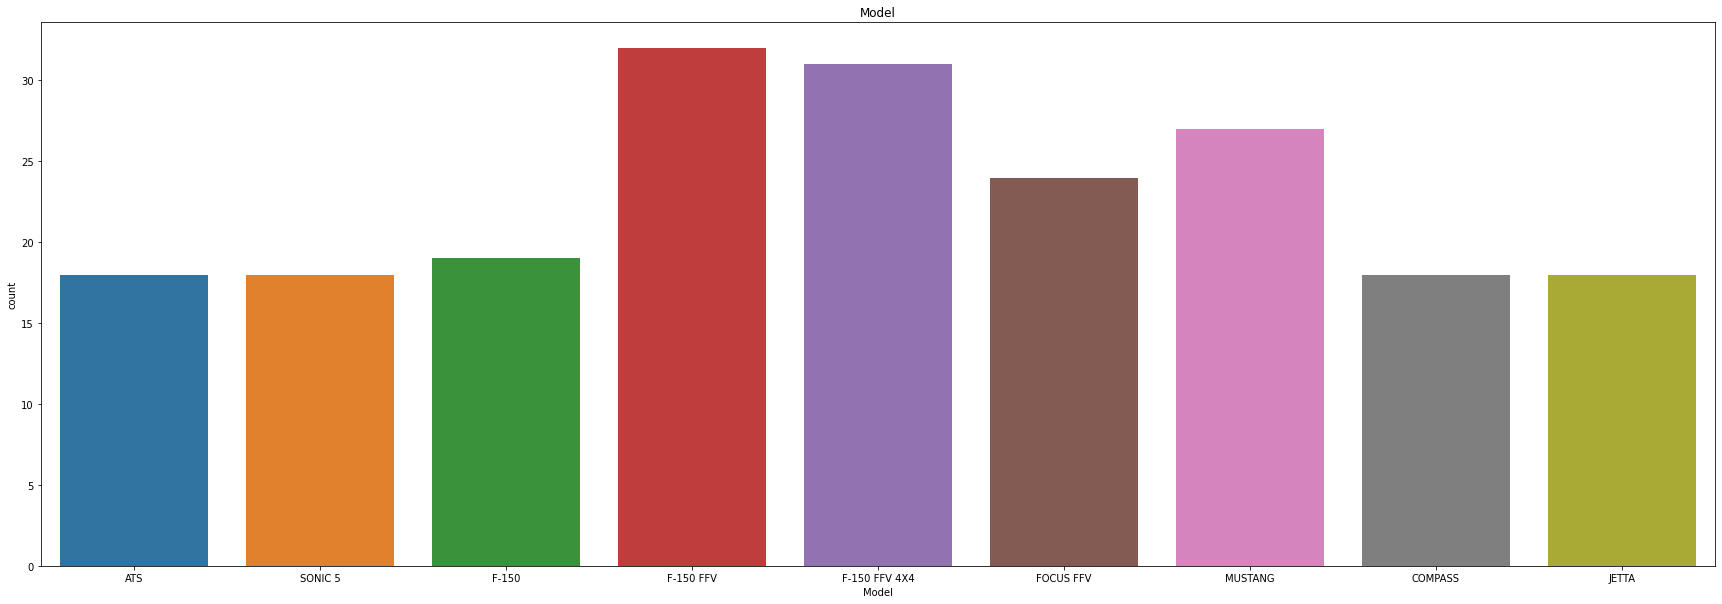

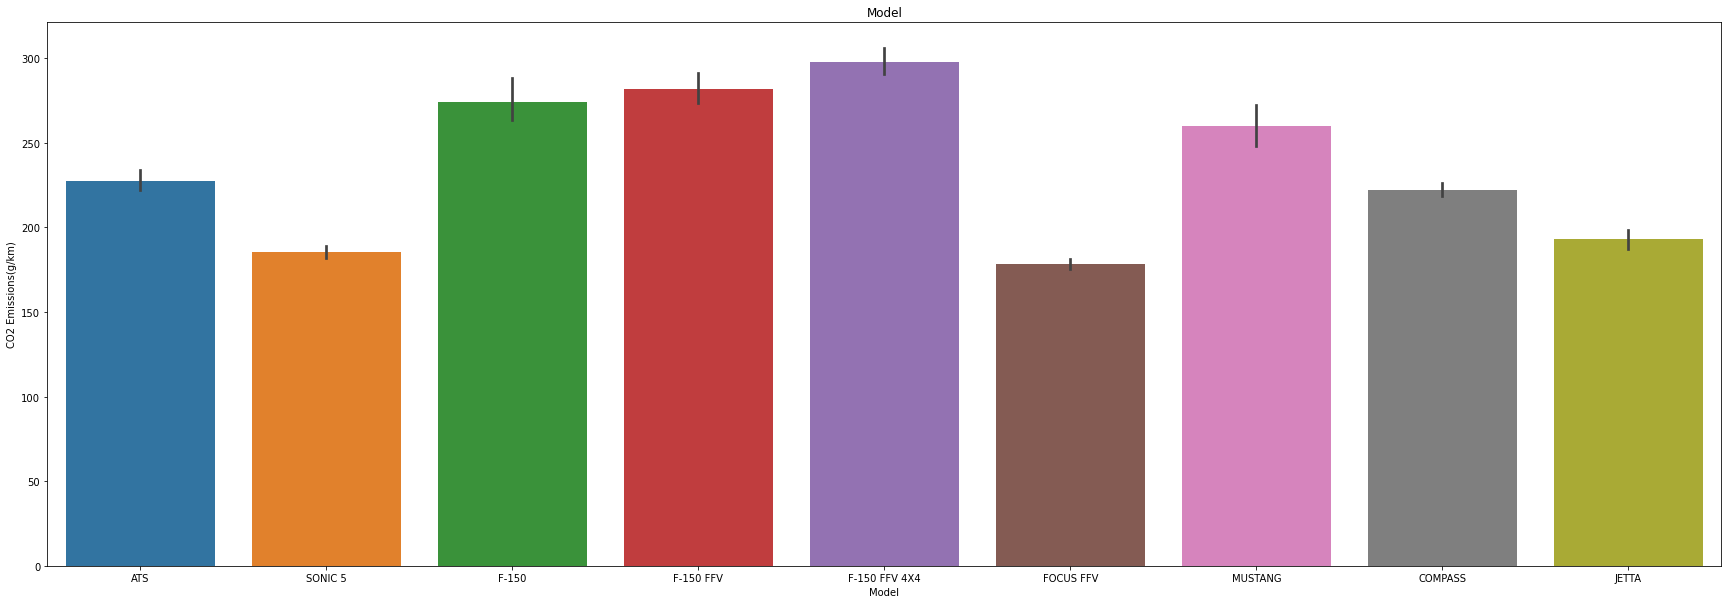

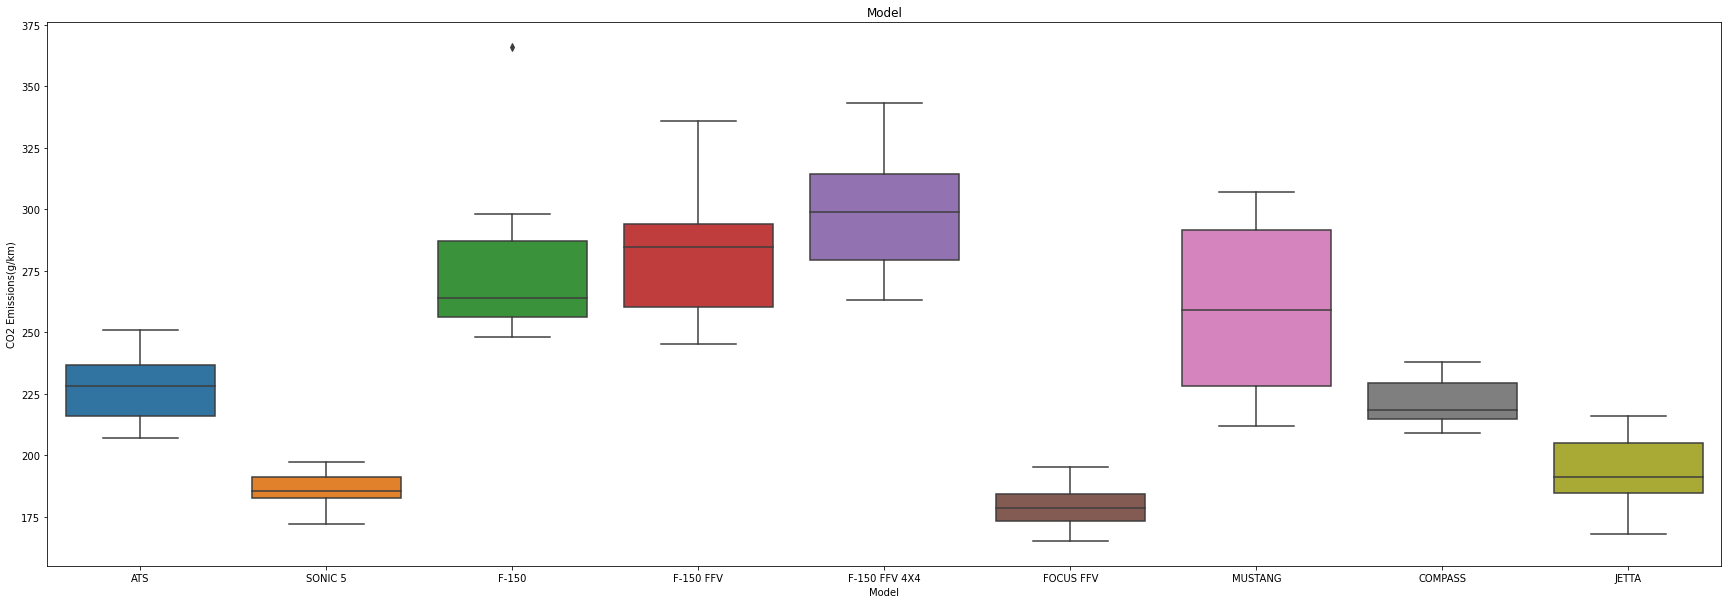

In [26]:
for column in categorical_10:
    print(df_models['CO2 Emissions(g/km)'].groupby(df_models[column]).sum())
    plt.figure(figsize=(20,10))
    df_models['CO2 Emissions(g/km)'].groupby(df_models[column]).sum().plot(kind = 'bar')
    plt.title(column)
    plt.show()
    print(df_models['CO2 Emissions(g/km)'].groupby(df_models[column]).describe())
    plt.figure(figsize=(30,10))
    sns.countplot(x =df_models[column])
    plt.title(column)
    plt.show()
    plt.figure(figsize=(30,10))
    sns.barplot(x = df_models[column], y= df_models['CO2 Emissions(g/km)'])
    plt.title(column)
    plt.show()
    plt.figure(figsize=(30,10))
    sns.boxplot(x =df_models[column], y=df_models['CO2 Emissions(g/km)'])
    plt.title(column)
    plt.show()

In [27]:
# Make
# Count of Ford is significantly higher so overall Co2 Emission by Ford is also higher

#  From bargraph and boxplot we can see, Avg. Co2 Emission by by the top 10 brands is also having a small range, Slight deviation is present because of the mix of class
# of vehicles sold by the brands

# Model
# F-150 FFV, F-150 FFV 4X4, Mustang is having highest Co2 Emission in total
# Similar pattern in countplot justifies the same.

# Jetta, Focus FFV, Sonic 5 have less Co2 emission compared to other models

In [28]:
df['CO2 Emissions(g/km)'].groupby(df['Make']).sum().sort_values(ascending=False)

Make
FORD             150762
CHEVROLET        136206
BMW              126510
MERCEDES-BENZ    101732
GMC               86853
PORSCHE           76721
AUDI              66454
TOYOTA            61805
NISSAN            50561
JEEP              50159
DODGE             49876
KIA               41049
MINI              39314
VOLKSWAGEN        39241
HYUNDAI           38259
CADILLAC          37526
JAGUAR            32224
HONDA             31367
LEXUS             31234
VOLVO             27134
SUBARU            25956
MAZDA             24480
INFINITI          22099
LAND ROVER        21894
LINCOLN           21531
BUICK             21505
RAM               21181
ROLLS-ROYCE       18660
MASERATI          16543
CHRYSLER          15619
LAMBORGHINI       14884
MITSUBISHI        14607
ASTON MARTIN      13427
BENTLEY           12877
ACURA             11305
FIAT              10768
ALFA ROMEO         4395
SCION              4217
GENESIS            3956
SMART              1060
BUGATTI            1044
SRT        

In [29]:
df['CO2 Emissions(g/km)'].groupby(df['Model']).sum().sort_values(ascending=False)

Model
F-150 FFV 4X4     9235
F-150 FFV         9016
MUSTANG           7015
F-150 4X4         5879
F-150             5209
                  ... 
NIRO FE            110
Prius AWD          109
Corolla Hybrid     106
IONIQ Blue          96
IONIQ BLUE          96
Name: CO2 Emissions(g/km), Length: 2053, dtype: int64

In [30]:
# We can see top 10 gives a pretty clear picture to contribution to Co2 Emission

In [31]:
class_label = df['Vehicle Class'].value_counts().index

In [32]:
class_values = df['Vehicle Class'].value_counts().values

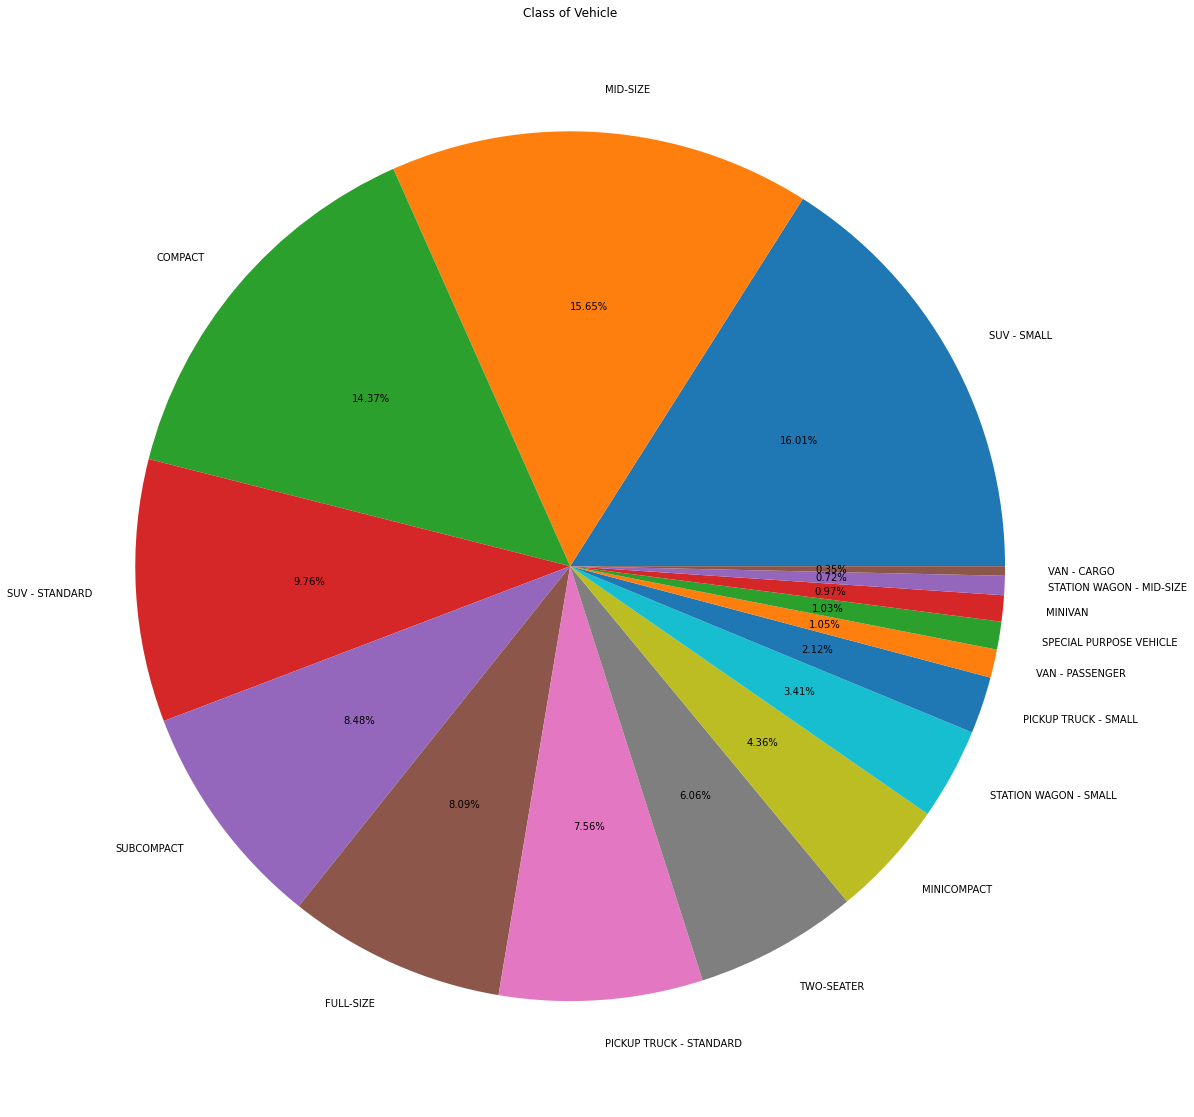

In [33]:
plt.figure(figsize = (30,20))
plt.pie(class_values, labels=class_label, autopct='%1.2f%%')
plt.title("Class of Vehicle")
plt.show()

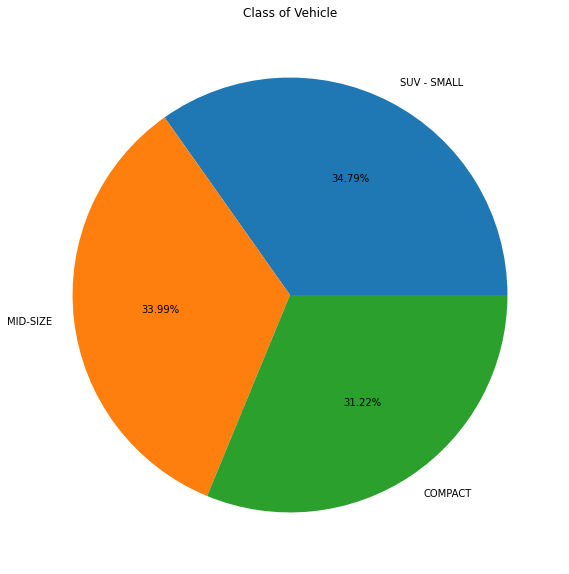

In [34]:
plt.figure(figsize = (10,10))
plt.pie(class_values[:3], labels=class_label[:3], autopct='%1.2f%%')
plt.title("Class of Vehicle")
plt.show()

In [35]:
# Cars that are sold majorly are Small SUV, Mid Size and Compact Cars

In [36]:
df['Fuel Type'].value_counts()

X    3039
Z    2765
E     330
D     147
N       1
Name: Fuel Type, dtype: int64

In [37]:
fuel_type_labels = df['Fuel Type'].value_counts().index

In [38]:
fuel_type_values = df['Fuel Type'].value_counts().values

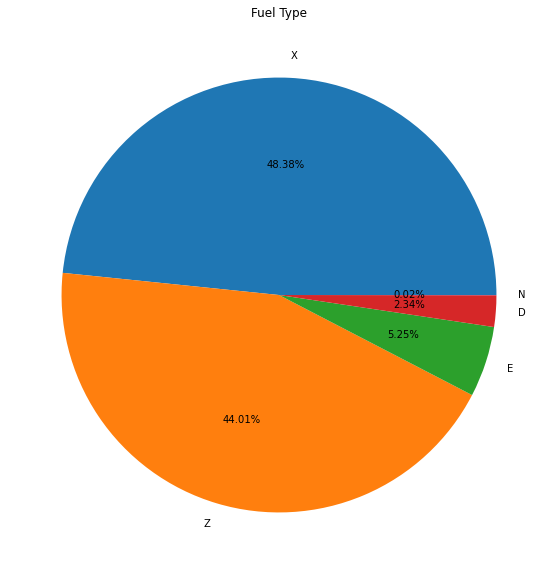

In [39]:
plt.figure(figsize = (20,10))
plt.pie(fuel_type_values, labels=fuel_type_labels, autopct='%1.2f%%')
plt.title("Fuel Type")
plt.show()

In [40]:
# X and Z are the major fuel type sold

In [41]:
df['Cylinders'].value_counts()

4     2749
6     2040
8     1202
12     135
3       88
10      40
5       26
16       2
Name: Cylinders, dtype: int64

In [42]:
cylinders_labels = df['Cylinders'].value_counts().index

In [43]:
cylinders_values = df['Cylinders'].value_counts().values

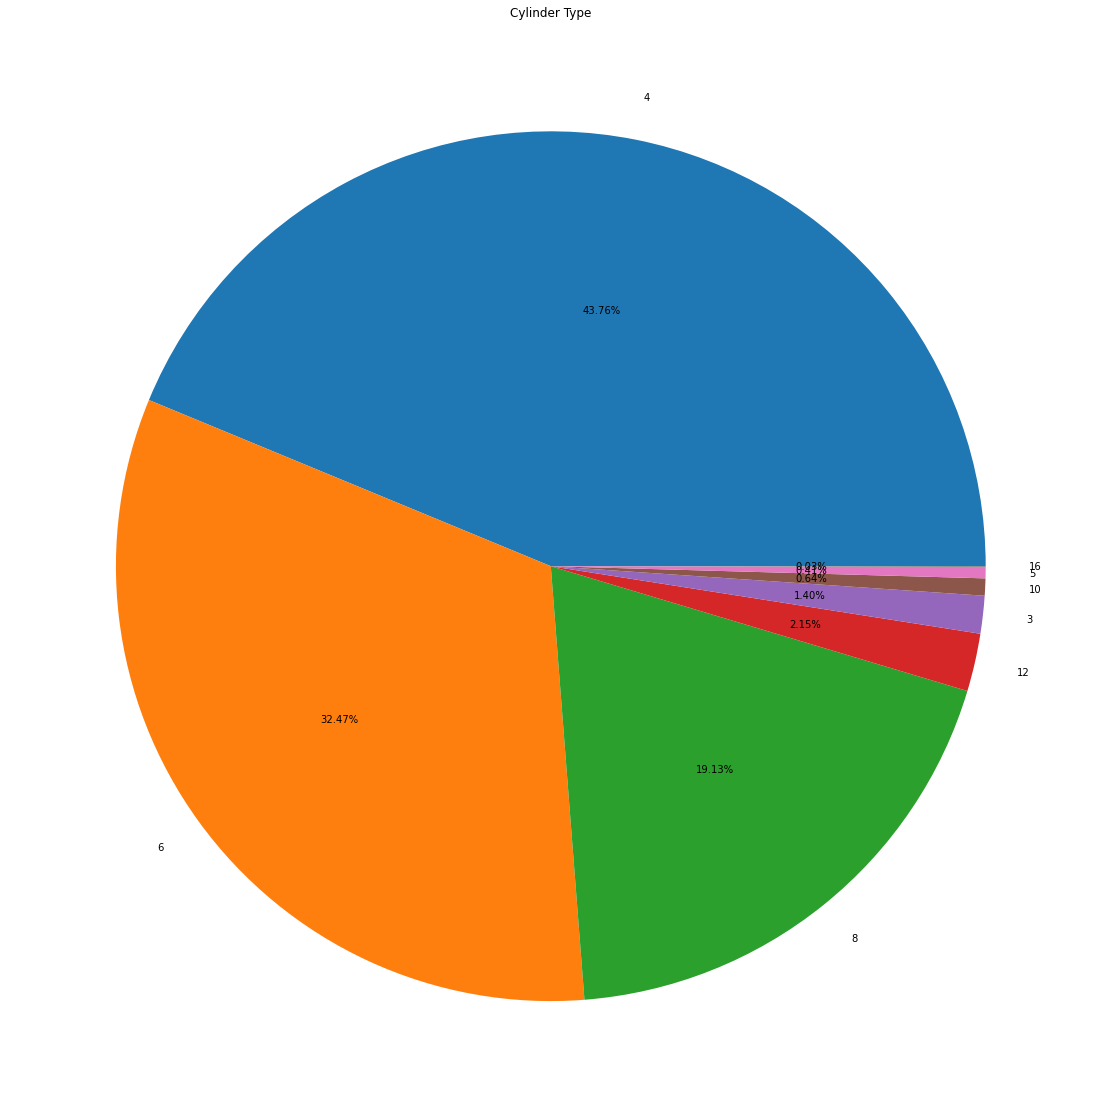

In [44]:
plt.figure(figsize = (30,20))
plt.pie(cylinders_values, labels=cylinders_labels, autopct='%1.2f%%')
plt.title("Cylinder Type")
plt.show()

In [45]:
df['Transmission'].value_counts()

AS6     1139
AS8     1056
M6       773
A6       684
AM7      383
A8       378
AS7      283
A9       263
AV       241
M5       168
AS10     151
AM6      107
AV7       92
AV6       89
A5        78
M7        78
AS9       65
A4        61
AM8       45
A7        44
AV8       34
A10       28
AS5       26
AV10       9
AM5        4
AS4        2
AM9        1
Name: Transmission, dtype: int64

In [46]:
transmission_labels = df['Transmission'].value_counts().index

In [47]:
transmission_values = df['Transmission'].value_counts().values

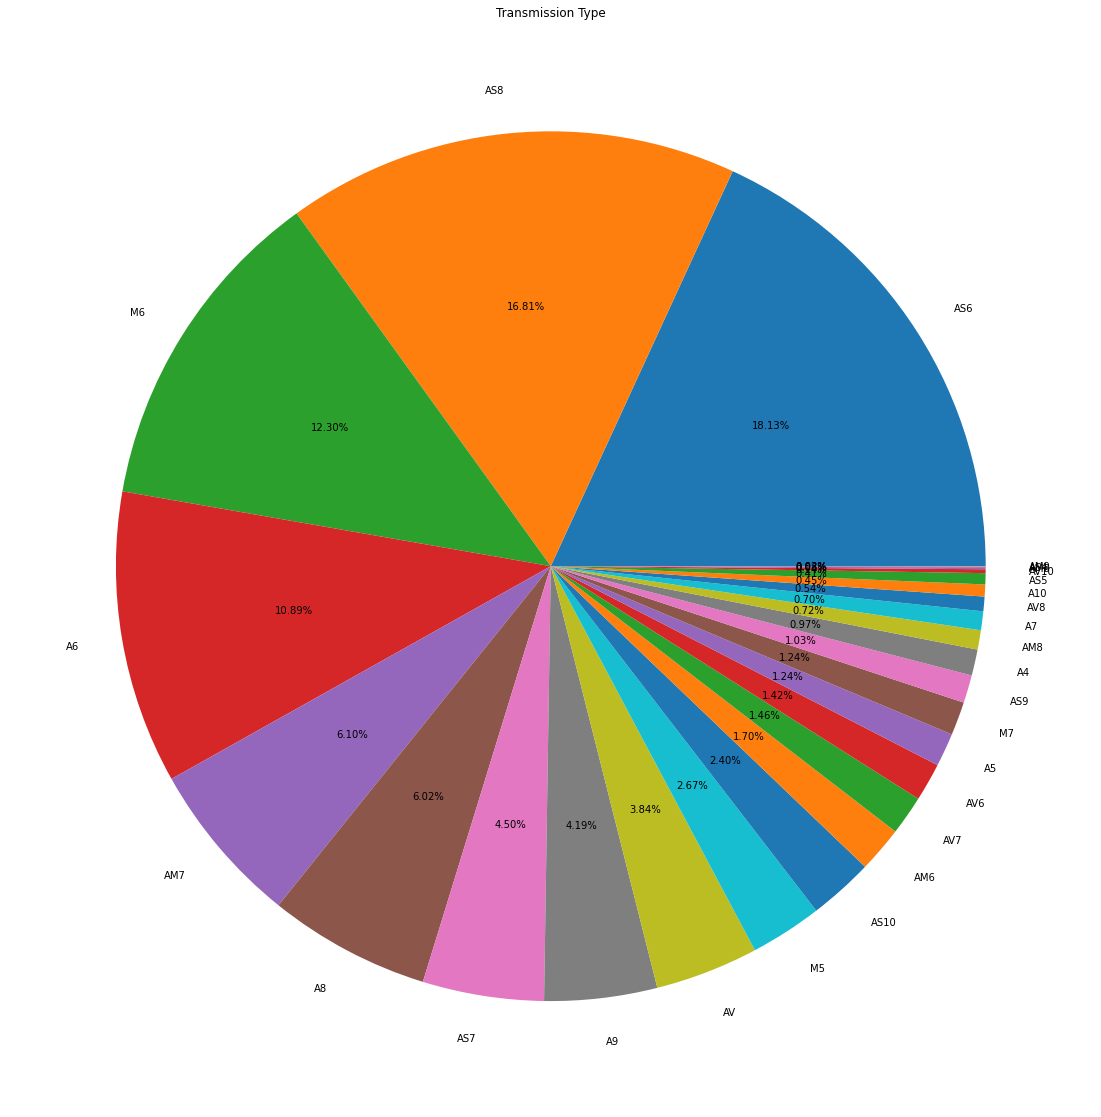

In [48]:
plt.figure(figsize = (30,20))
plt.pie(transmission_values, labels=transmission_labels, autopct='%1.2f%%')
plt.title("Transmission Type")
plt.show()

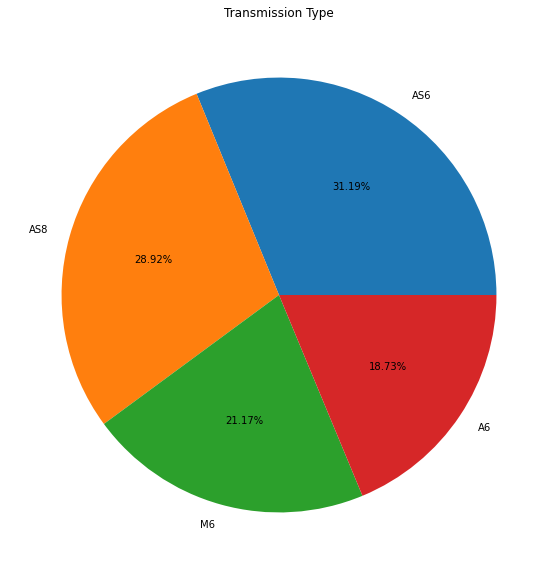

In [49]:
plt.figure(figsize=(10,10))
plt.pie(transmission_values[:4], labels=transmission_labels[:4], autopct='%1.2f%%')
plt.title("Transmission Type")
plt.show()

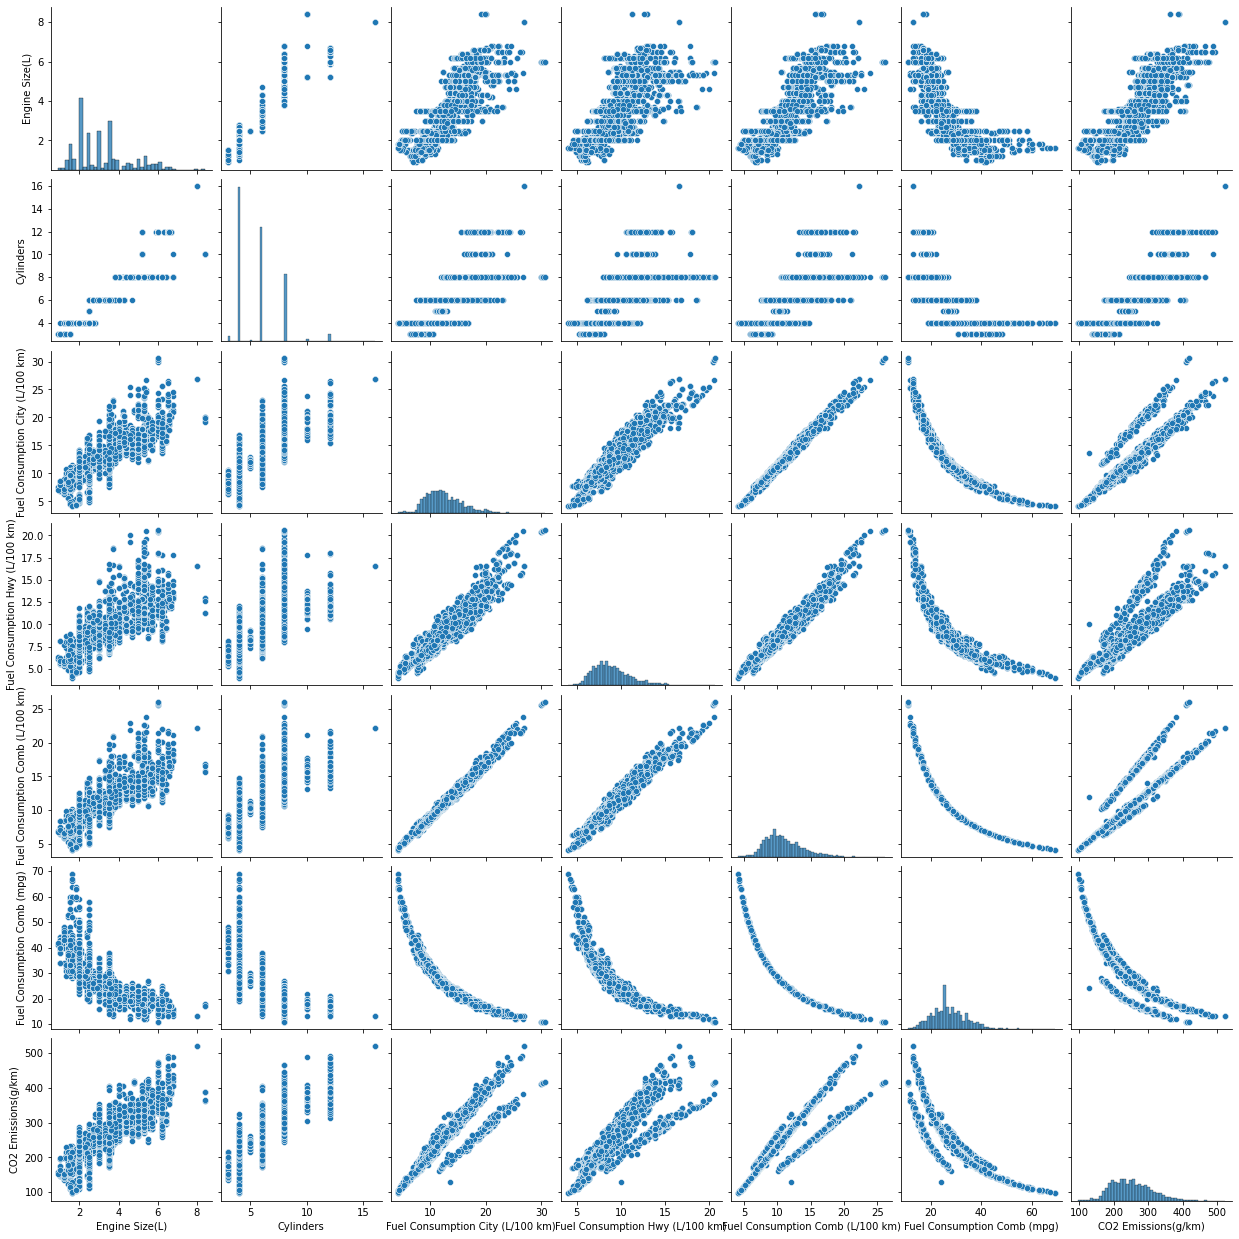

In [50]:
sns.pairplot(df)

In [51]:
df.corr()['CO2 Emissions(g/km)']

Engine Size(L)                      0.854802
Cylinders                           0.834687
Fuel Consumption City (L/100 km)    0.918756
Fuel Consumption Hwy (L/100 km)     0.883424
Fuel Consumption Comb (L/100 km)    0.916840
Fuel Consumption Comb (mpg)        -0.906783
CO2 Emissions(g/km)                 1.000000
Name: CO2 Emissions(g/km), dtype: float64

<AxesSubplot:>

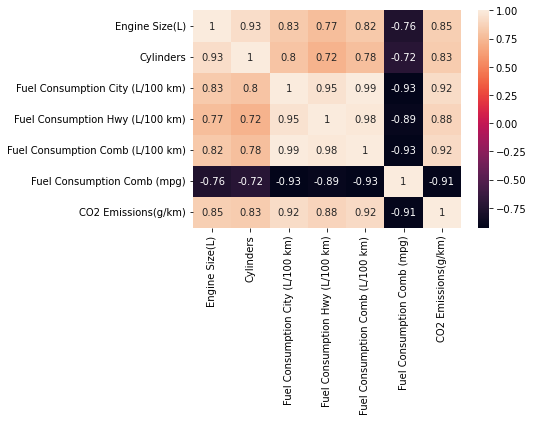

In [52]:
sns.heatmap(df.corr(), annot=True)

In [53]:
continuous = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']]

Engine Size(L):


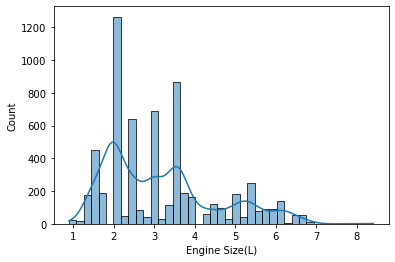

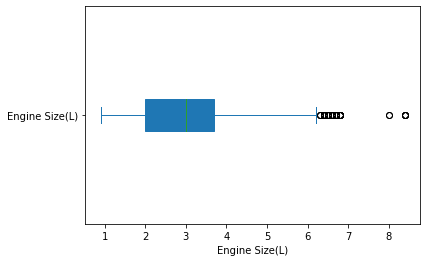

Cylinders:


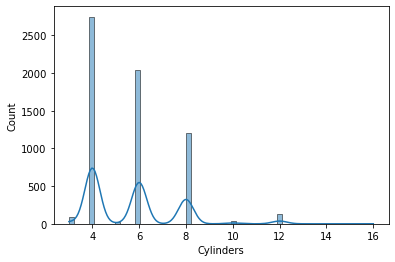

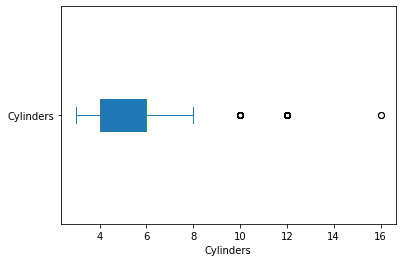

Fuel Consumption City (L/100 km):


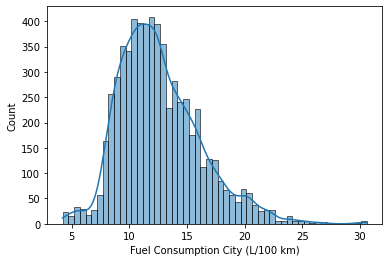

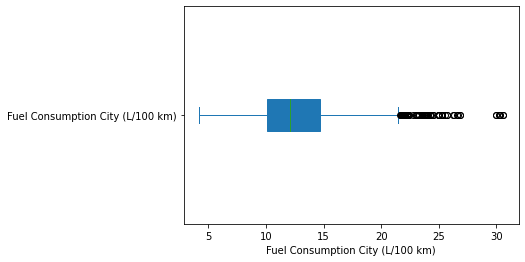

Fuel Consumption Hwy (L/100 km):


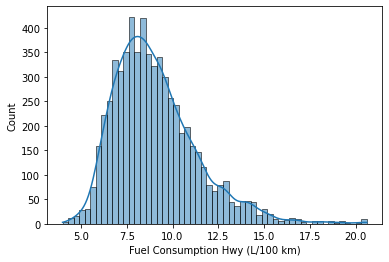

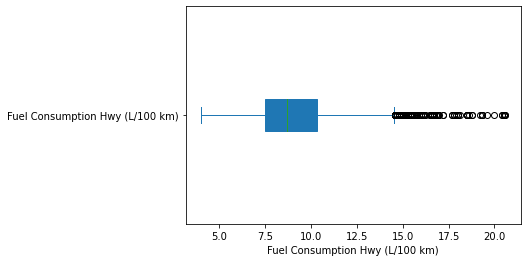

Fuel Consumption Comb (L/100 km):


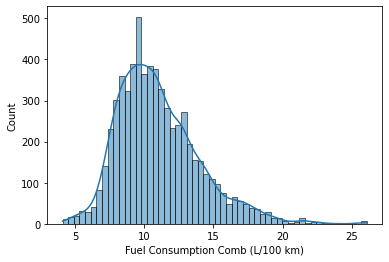

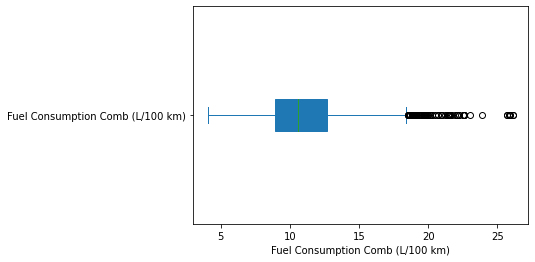

Fuel Consumption Comb (mpg):


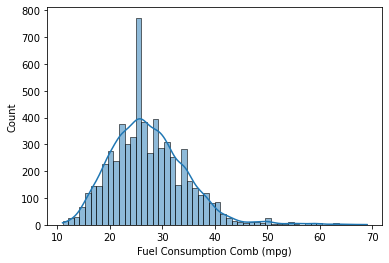

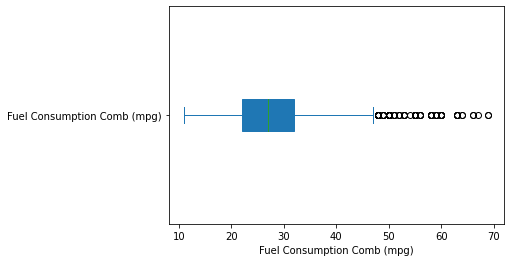

In [54]:
for i in continuous:
    print(i+":")
    plt.figure()
    sns.histplot(x = df[i], kde=True)
    plt.xlabel(i)
    plt.show()
    plt.figure()
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

In [55]:
# Using Cylinders only for EDA
categorical = ['Vehicle Class','Cylinders','Transmission','Fuel Type']

Vehicle Class
COMPACT                     196530
FULL-SIZE                   134319
MID-SIZE                    218514
MINICOMPACT                  64849
MINIVAN                      15928
PICKUP TRUCK - SMALL         36844
PICKUP TRUCK - STANDARD     143265
SPECIAL PURPOSE VEHICLE      15458
STATION WAGON - MID-SIZE     10834
STATION WAGON - SMALL        43375
SUBCOMPACT                  130355
SUV - SMALL                 237832
SUV - STANDARD              188026
TWO-SEATER                  107475
VAN - CARGO                   7953
VAN - PASSENGER              26216
Name: CO2 Emissions(g/km), dtype: int64


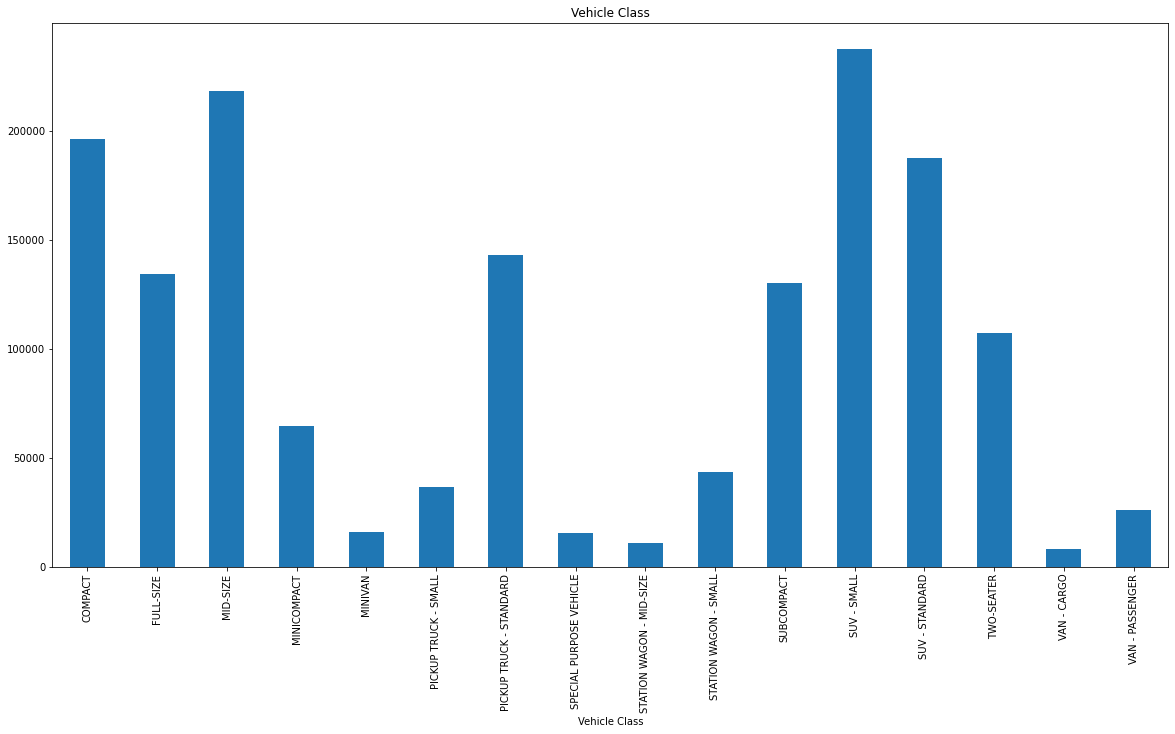

                           count        mean        std    min     25%    50%  \
Vehicle Class                                                                   
COMPACT                    903.0  217.641196  50.605773  106.0  183.50  207.0   
FULL-SIZE                  508.0  264.407480  55.784395   96.0  234.00  262.0   
MID-SIZE                   983.0  222.292981  55.529002  104.0  184.00  214.0   
MINICOMPACT                274.0  236.675182  41.059685  143.0  202.00  243.0   
MINIVAN                     61.0  261.114754  18.256595  221.0  250.00  262.0   
PICKUP TRUCK - SMALL       133.0  277.022556  22.497632  235.0  260.00  274.0   
PICKUP TRUCK - STANDARD    475.0  301.610526  31.037168  238.0  279.00  298.0   
SPECIAL PURPOSE VEHICLE     65.0  237.815385  19.974900  208.0  220.00  235.0   
STATION WAGON - MID-SIZE    45.0  240.755556  58.384367  126.0  216.00  230.0   
STATION WAGON - SMALL      214.0  202.686916  32.281335  110.0  189.00  199.0   
SUBCOMPACT                 5

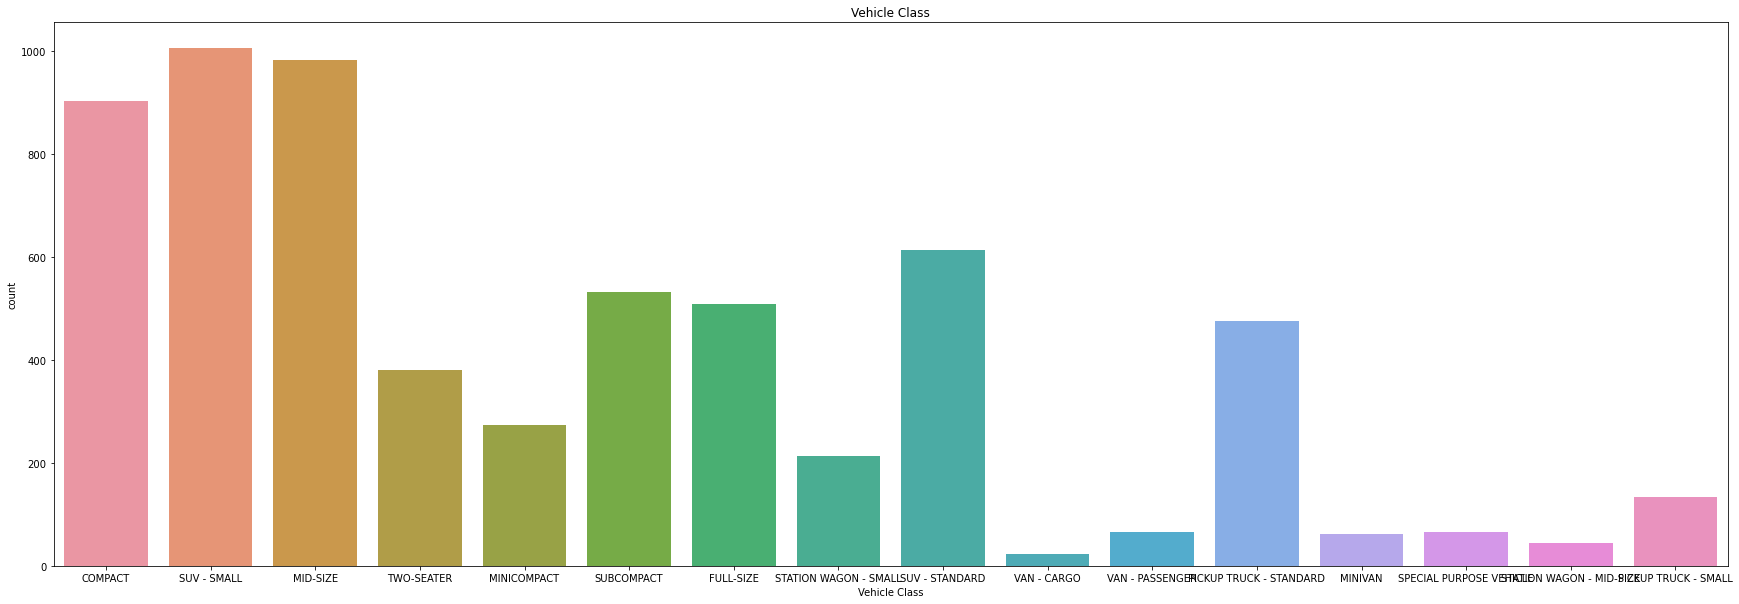

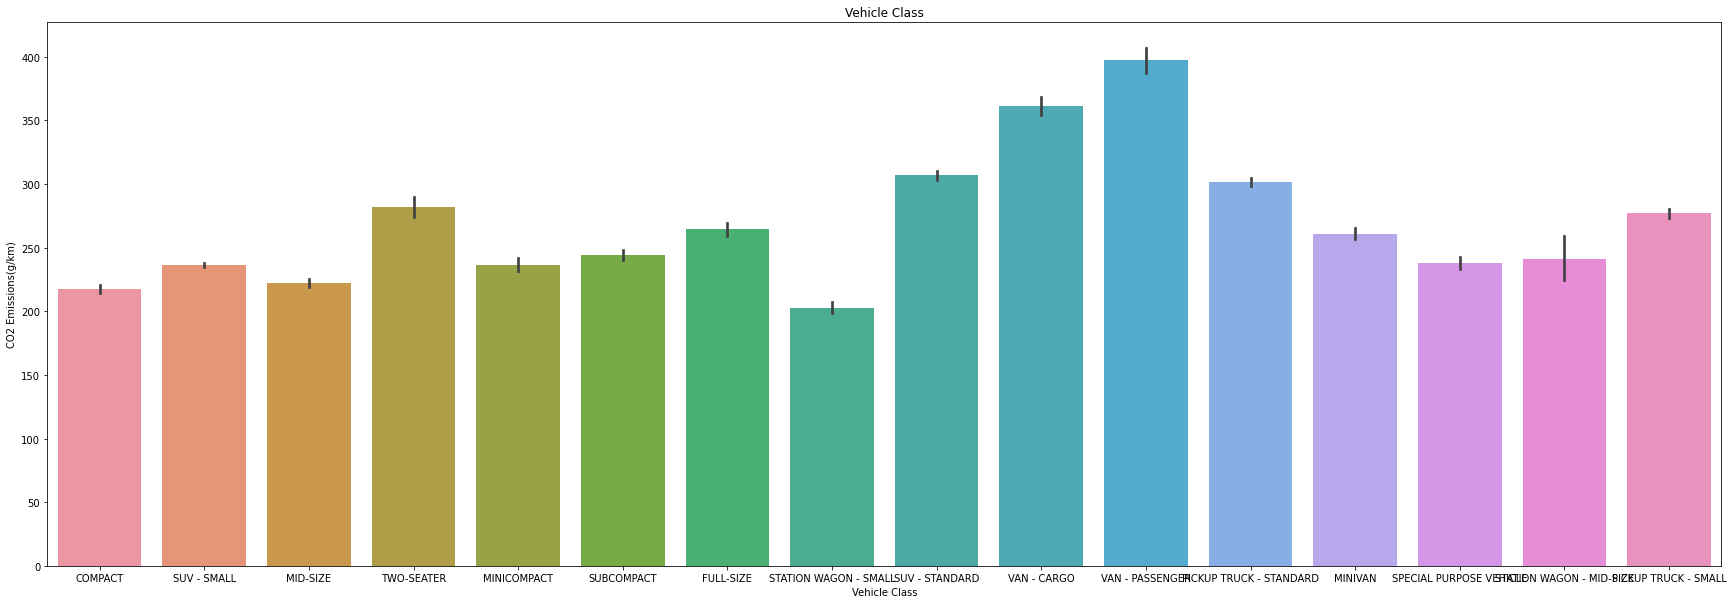

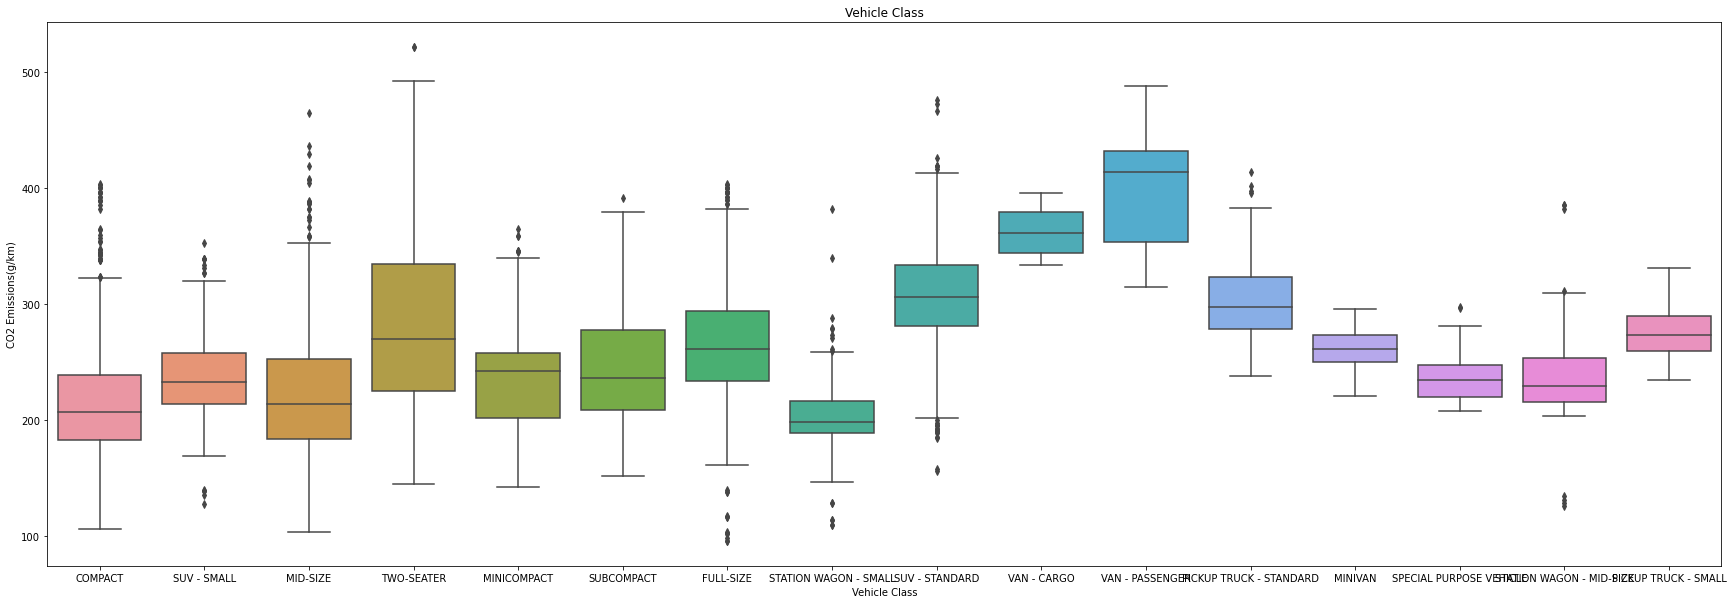

Cylinders
3      15551
4     563445
5       6128
6     538503
8     386939
10     14504
12     51659
16      1044
Name: CO2 Emissions(g/km), dtype: int64


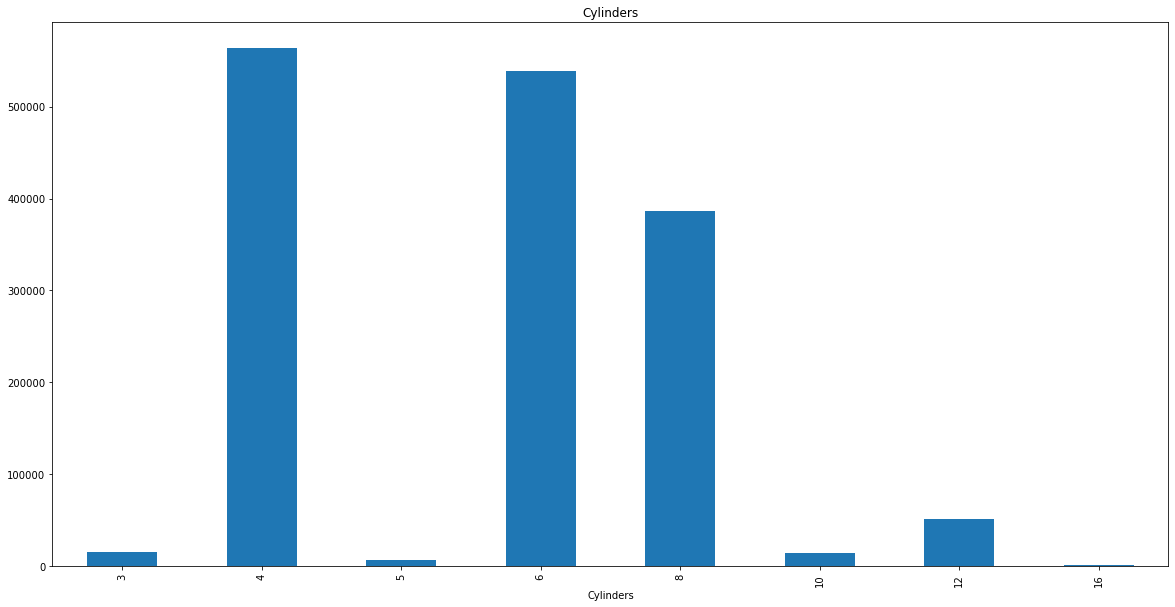

            count        mean        std    min     25%    50%    75%    max
Cylinders                                                                   
3            88.0  176.715909  22.464249  136.0  157.00  175.0  196.0  215.0
4          2749.0  204.963623  31.104149   96.0  186.00  205.0  225.0  326.0
5            26.0  235.692308  11.671398  216.0  226.75  233.0  242.5  262.0
6          2040.0  263.972059  29.679632  172.0  245.00  261.0  282.0  406.0
8          1202.0  321.912646  37.086076  244.0  297.00  315.5  340.0  465.0
10           40.0  362.600000  30.619082  304.0  345.25  363.5  370.0  488.0
12          135.0  382.659259  38.543281  312.0  355.50  380.0  397.0  493.0
16            2.0  522.000000   0.000000  522.0  522.00  522.0  522.0  522.0


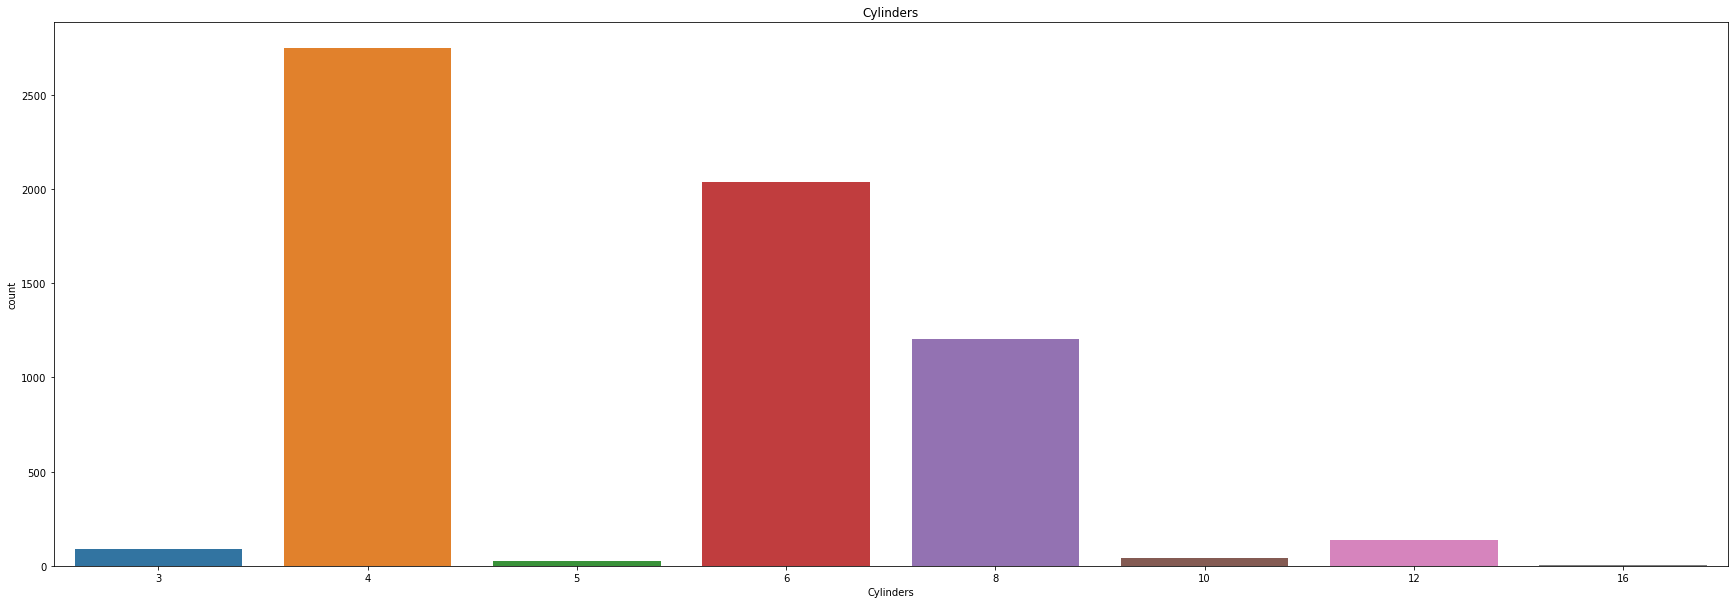

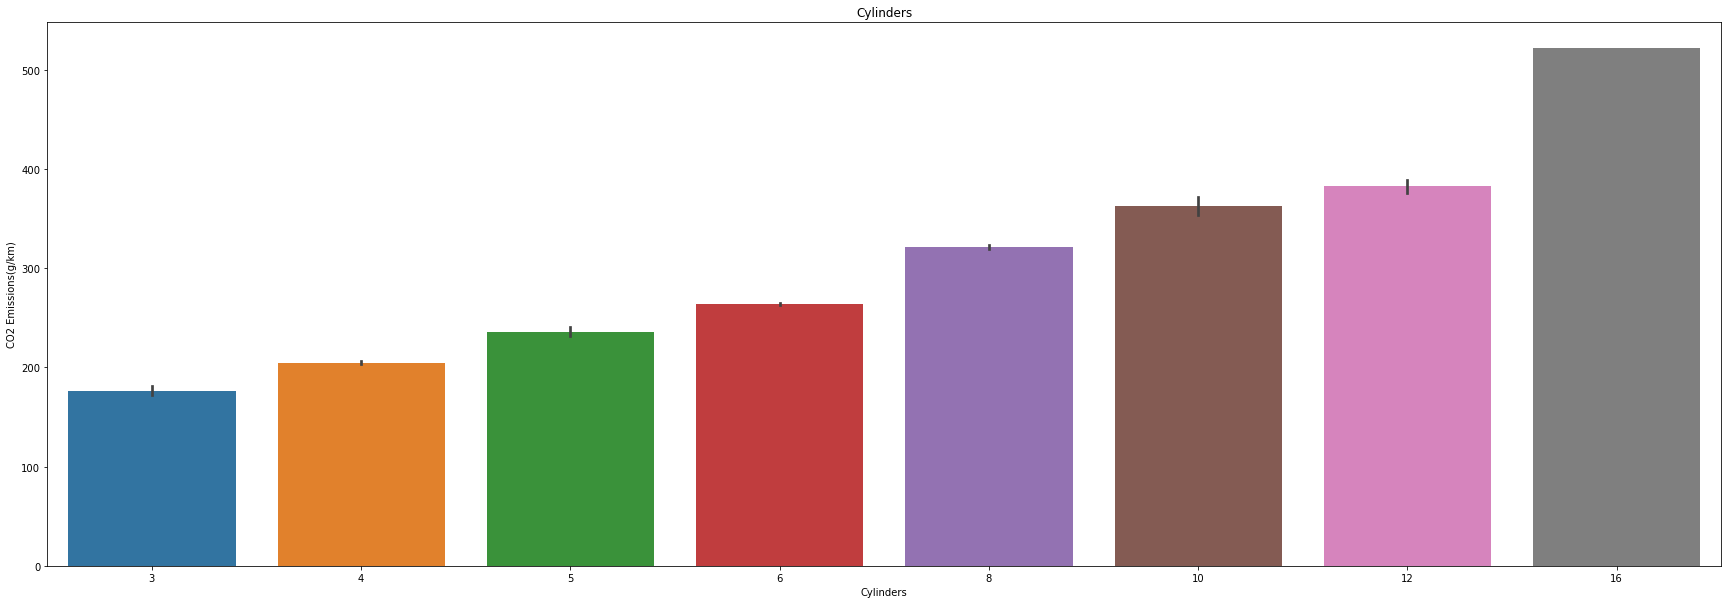

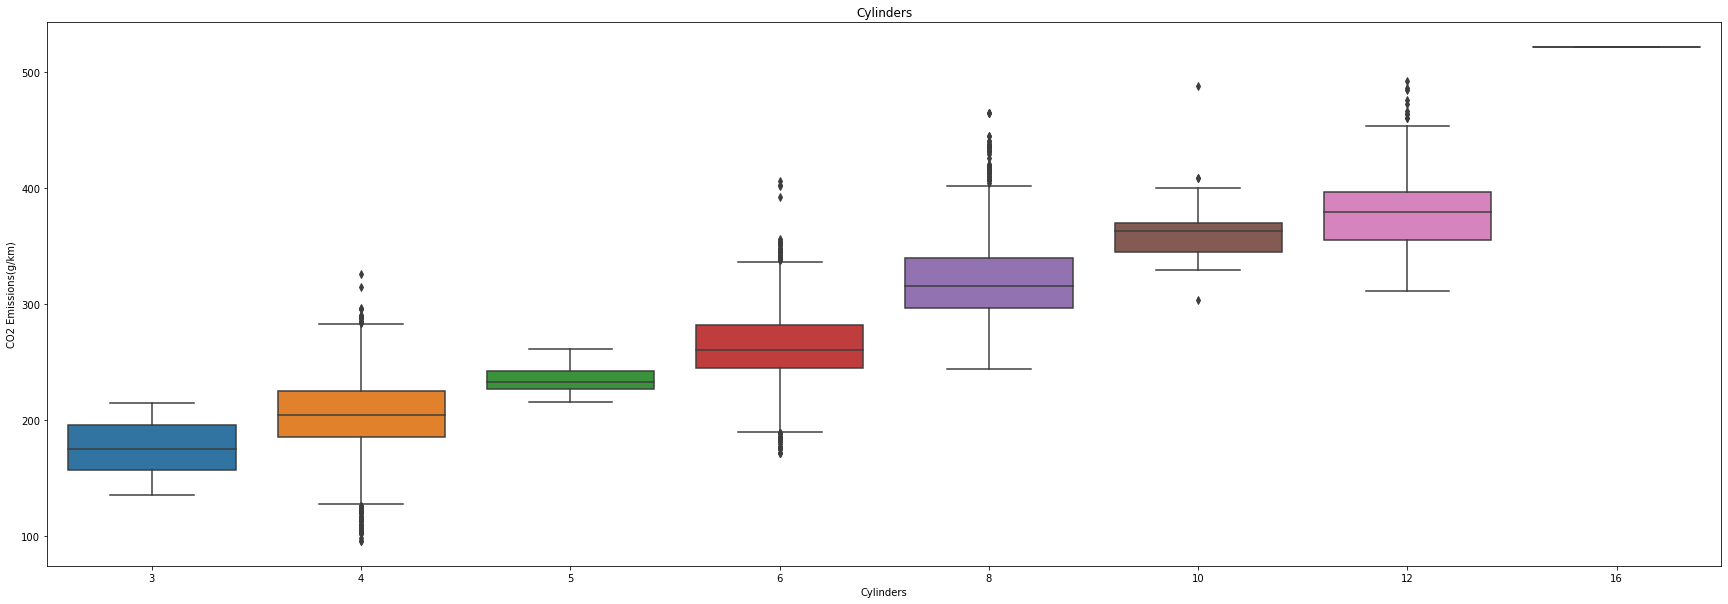

Transmission
A10       8791
A4       18092
A5       23351
A6      190698
A7       13828
A8      107887
A9       65058
AM5        594
AM6      20253
AM7     103355
AM8      11503
AM9        261
AS10     42752
AS4        453
AS5       7153
AS6     273676
AS7      78796
AS8     277132
AS9      15978
AV       41809
AV10      1633
AV6      16977
AV7      17688
AV8       7369
M5       32790
M6      179458
M7       20438
Name: CO2 Emissions(g/km), dtype: int64


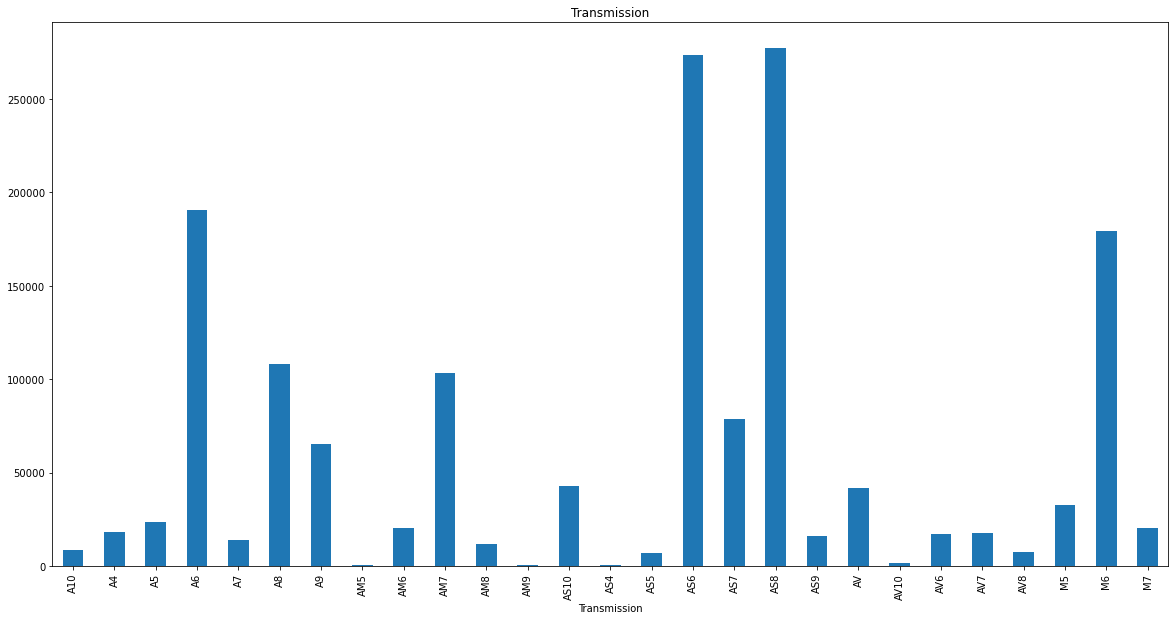

               count        mean        std    min     25%    50%     75%  \
Transmission                                                                
A10             28.0  313.964286  32.125313  238.0  304.75  325.5  332.25   
A4              61.0  296.590164  83.905577  168.0  196.00  344.0  368.00   
A5              78.0  299.371795  42.629820  172.0  271.00  299.0  313.00   
A6             684.0  278.798246  58.170524  162.0  235.75  280.0  313.00   
A7              44.0  314.272727  53.257323  248.0  279.25  291.0  355.25   
A8             378.0  285.415344  43.113624  181.0  257.00  286.0  322.00   
A9             263.0  247.368821  35.994233  172.0  225.00  240.0  265.00   
AM5              4.0  148.500000   1.732051  147.0  147.00  148.5  150.00   
AM6            107.0  189.280374  47.892922   96.0  161.50  197.0  216.00   
AM7            383.0  269.856397  68.689854  122.0  221.00  253.0  302.50   
AM8             45.0  255.622222  43.202109  189.0  232.00  253.0  273.00   

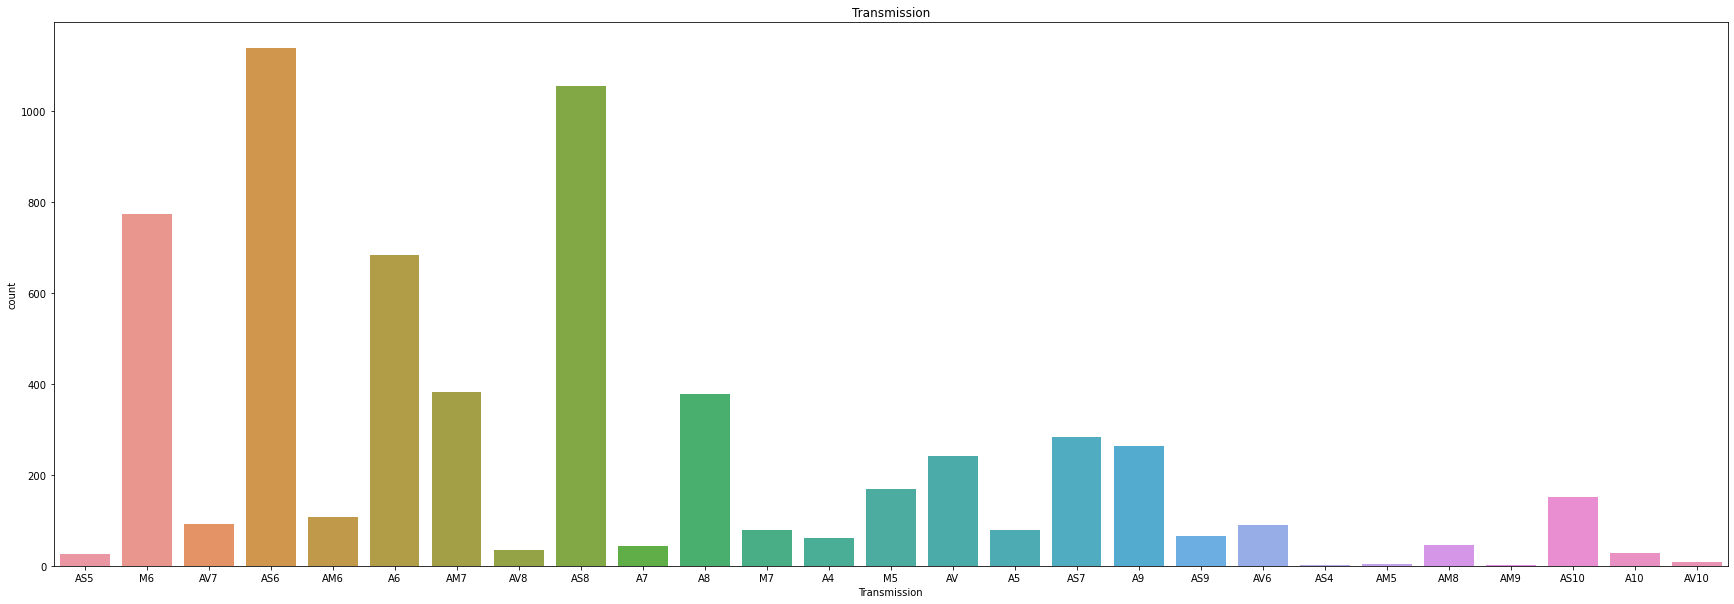

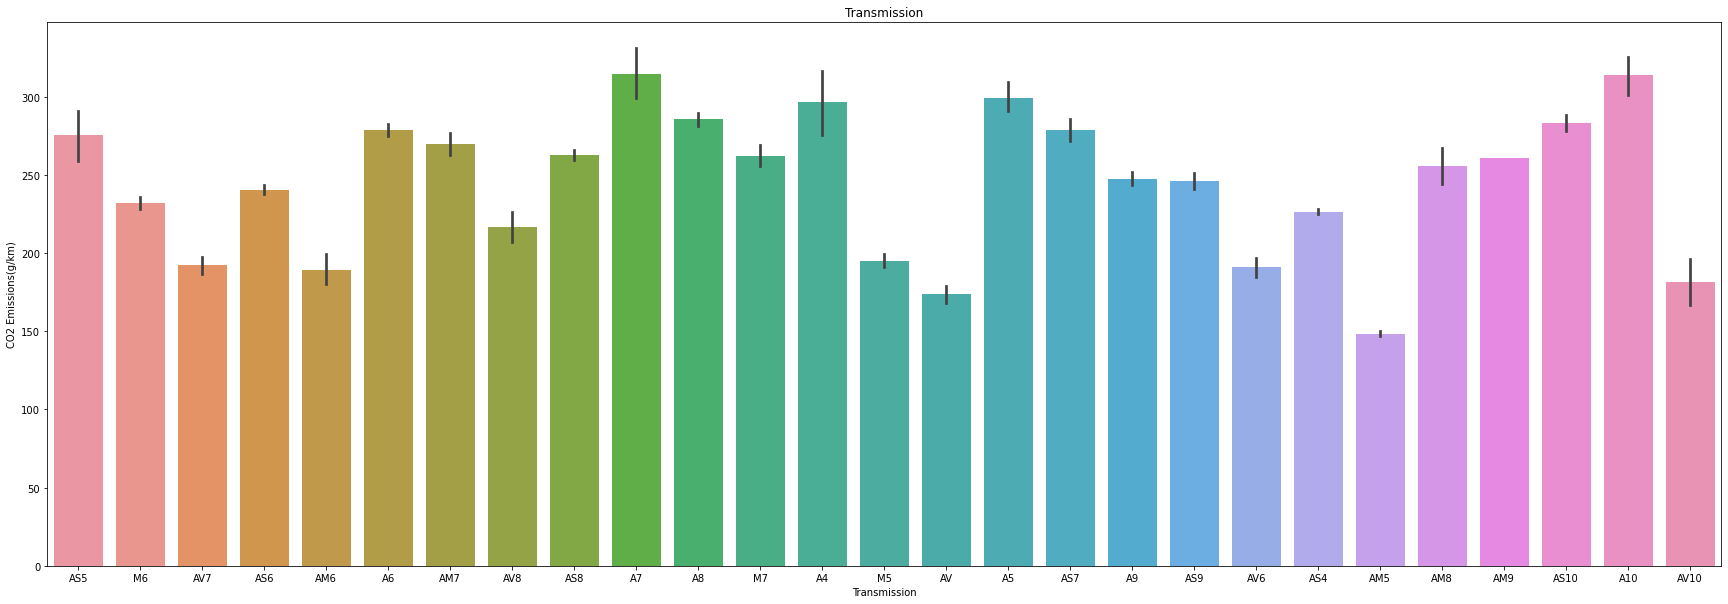

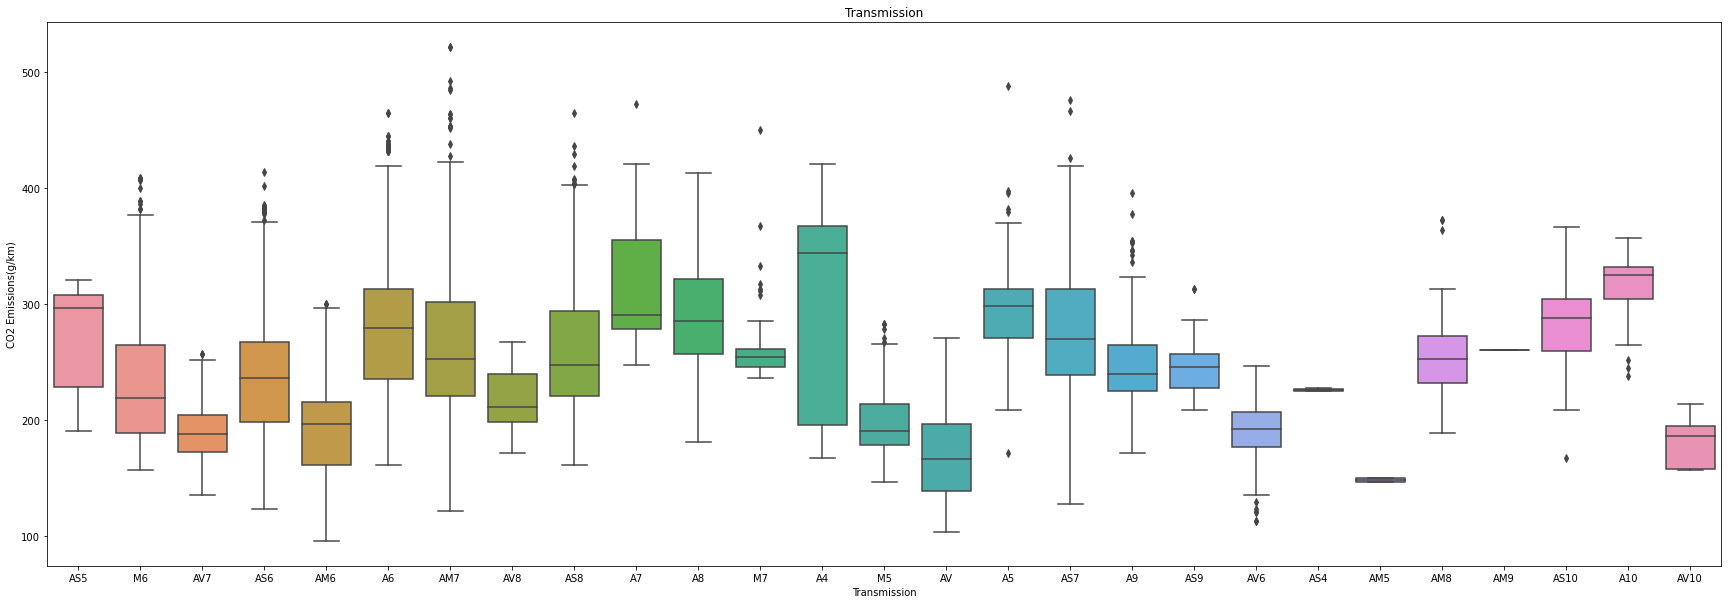

Fuel Type
D     34580
E     91096
N       213
X    717137
Z    734747
Name: CO2 Emissions(g/km), dtype: int64


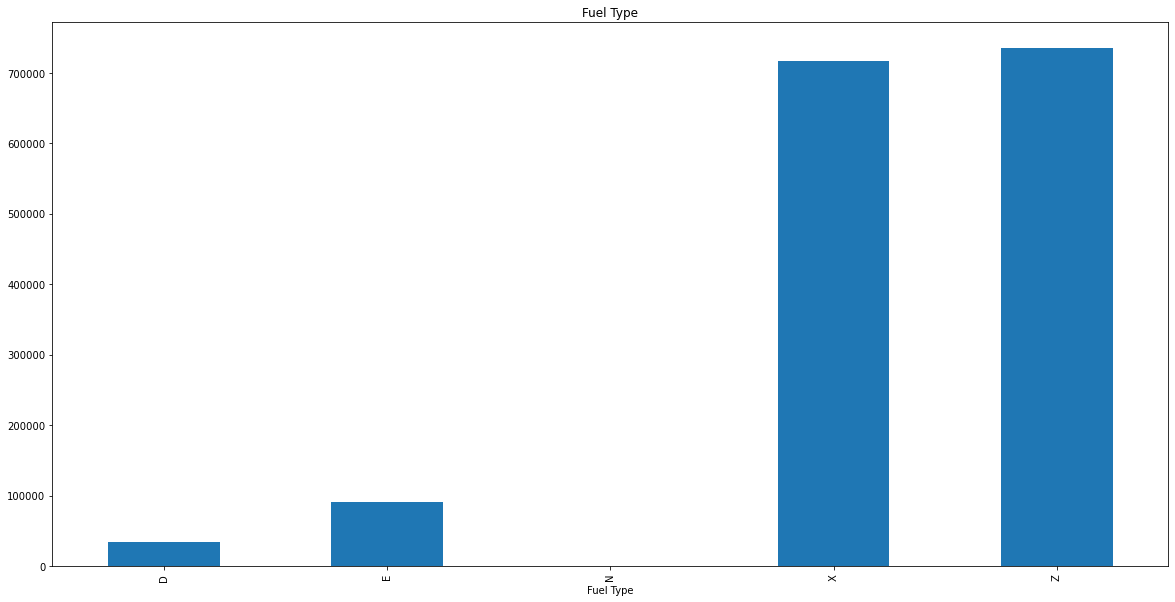

            count        mean        std    min    25%    50%    75%    max
Fuel Type                                                                  
D           147.0  235.238095  41.911736  169.0  198.0  243.0  270.0  326.0
E           330.0  276.048485  48.742211  128.0  247.0  280.0  300.0  418.0
N             1.0  213.000000        NaN  213.0  213.0  213.0  213.0  213.0
X          3039.0  235.977953  58.303652   96.0  192.0  229.0  274.0  488.0
Z          2765.0  265.731284  57.643169  122.0  223.0  254.0  301.0  522.0


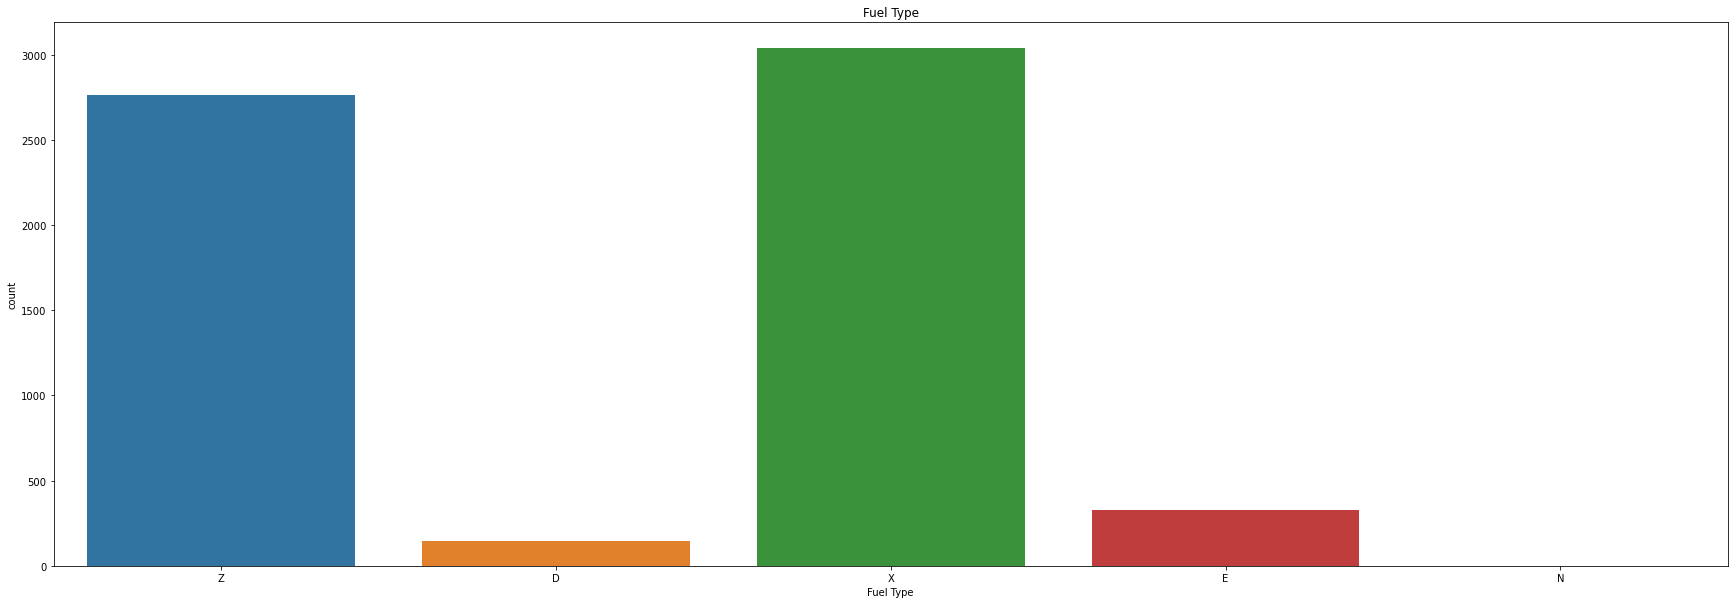

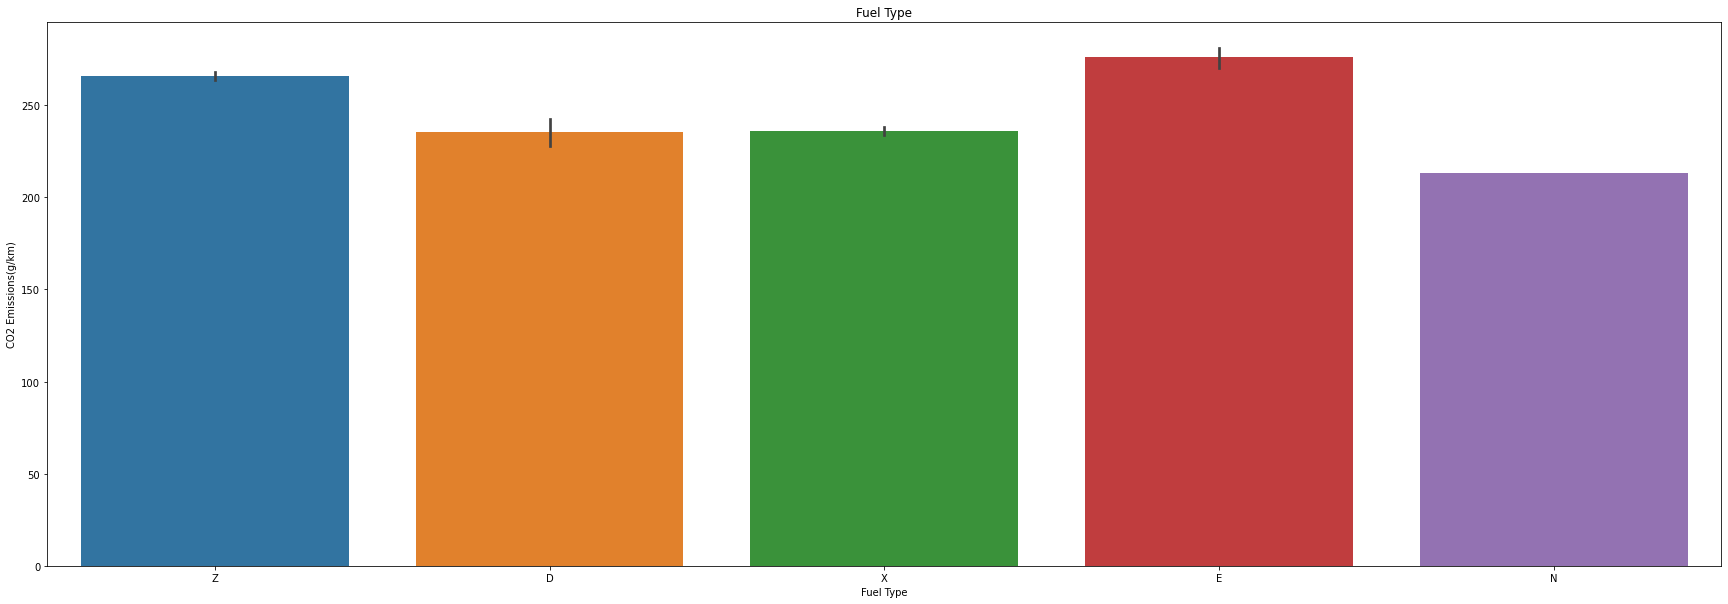

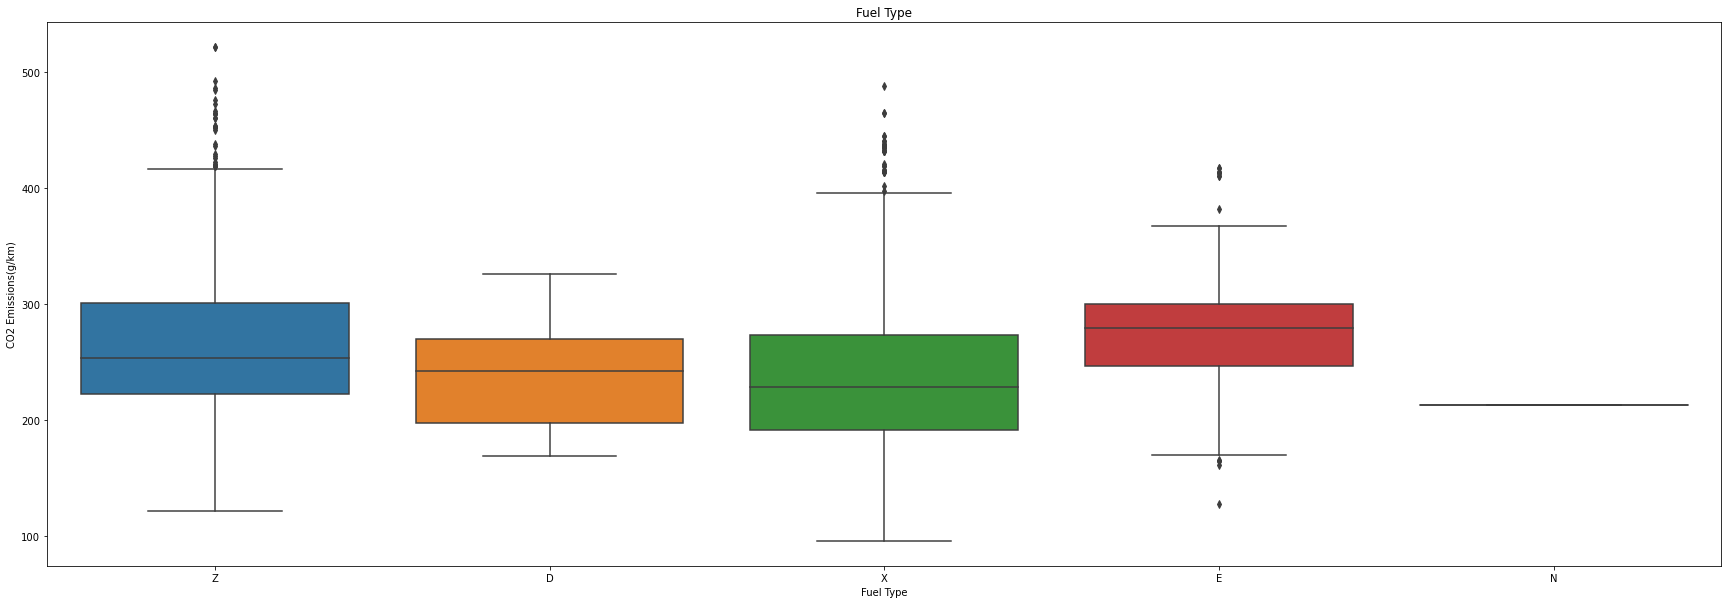

In [56]:
for column in categorical:
    print(df['CO2 Emissions(g/km)'].groupby(df[column]).sum())
    plt.figure(figsize=(20,10))
    df['CO2 Emissions(g/km)'].groupby(df[column]).sum().plot(kind = 'bar')
    plt.title(column)
    plt.show()
    print(df['CO2 Emissions(g/km)'].groupby(df[column]).describe())
    plt.figure(figsize=(30,10))
    sns.countplot(x =df[column])
    plt.title(column)
    plt.show()
    plt.figure(figsize=(30,10))
    sns.barplot(x = df[column], y= df['CO2 Emissions(g/km)'])
    plt.title(column)
    plt.show()
    plt.figure(figsize=(30,10))
    sns.boxplot(x =df[column], y=df['CO2 Emissions(g/km)'])
    plt.title(column)
    plt.show()

In [57]:
# Vehicle Class
# We can see that highest amount of Co2 is contributed by SUV Small and Std Vehicles along with Compact and Mid Size Cars.
# Significant amount of contribution comes from full-size vehicles, pick-up truck standard subcompact and two seater cars

# Interestingly, we can see count of SUV standard is not very high but contribution to Co2 Emission is quite high

# From the bargraph and boxplot we can see avg contribution to Co2 Emission by SUV- Std is quite high. Special Attention is required towards SUV-Std
# as count of SUV is significant but no very high but still it is one of the top contributors to Co2 Emission

# Cylinders
# We can see that highest amount of Co2 is contributed by 4 cylinders,followed by 6 cylinders and 8 cylinders

# The same pattern is followed in countplot. Special attention is required to improve 6 cylinders engines and count is significant
# but contributions to Co2 is almost same as 4 cylinders engines in total

# From the bargraph and boxplot we can see, avg contibution to Co2 Emission increases with number of cylinders

#Transmission
# Highest amount of contribution to Co2 Emission is by AS6 and AS8 type, followed by A6 and M6 type. Significant Contribution 
# is also given by A8,AM7 and AS7

# Count of M6, AS6, A6, AS8 is also high. We can the Co2 Emission is more or less directly proportional to count.

# From Bargraph and Boxplot we can see the range of average Co2 Emission is small. 
# AV7, AM6, M5, AV, AV6, AM5, AV10 avg Co2 Emission is less.

# Fuel_type
# Clearly X & Z fuel type have highest Co2 Emission in total.

# Again Co2 Emission in total is directly proportional to count. There is no anomally

# On an average Co2 Emission for all fuel type is same

In [58]:
df['Make'].value_counts().head(10).index

Index(['FORD', 'CHEVROLET', 'BMW', 'MERCEDES-BENZ', 'PORSCHE', 'GMC', 'TOYOTA',
       'AUDI', 'NISSAN', 'MINI'],
      dtype='object')

In [59]:
top_10_make = [x for x in df['Make'].value_counts().head(10).sort_values(ascending = False).index]

In [60]:
top_10_make

['FORD',
 'CHEVROLET',
 'BMW',
 'MERCEDES-BENZ',
 'PORSCHE',
 'GMC',
 'TOYOTA',
 'AUDI',
 'NISSAN',
 'MINI']

In [61]:
# for label in top_10_make:
#     df[label] = np.where(df['Make'] == label, 1, 0)

# df[['Make' + top_10_make]].head()

In [62]:
#df.head()

In [63]:
def one_hot_top_x(df, column, top_x_labels):
    for label in top_x_labels:
        df[column + '_' + label] = np.where(df[column] == label,1,0)

In [64]:
one_hot_top_x(df, 'Make', top_10_make)

In [65]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_FORD,Make_CHEVROLET,Make_BMW,Make_MERCEDES-BENZ,Make_PORSCHE,Make_GMC,Make_TOYOTA,Make_AUDI,Make_NISSAN,Make_MINI
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0,0,0,0,0,0,0,0,0,0
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0,0,0,0,0,0,0,0,0,0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0,0,0,0,0,0,0,0,0,0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0,0,0,0,0,0,0,0,0,0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0,0,0,0,0,0,0,0,0,0


In [66]:
top_10_model = [x for x in df['Model'].value_counts().head(10).sort_values(ascending = False).index]

In [67]:
top_10_model

['F-150 FFV',
 'F-150 FFV 4X4',
 'MUSTANG',
 'FOCUS FFV',
 'F-150 4X4',
 'F-150',
 'SONIC 5',
 'ATS',
 'JETTA',
 'COMPASS']

In [68]:
one_hot_top_x(df, 'Model', top_10_model)

In [69]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_FORD,Make_CHEVROLET,Make_BMW,Make_MERCEDES-BENZ,Make_PORSCHE,Make_GMC,Make_TOYOTA,Make_AUDI,Make_NISSAN,Make_MINI,Model_F-150 FFV,Model_F-150 FFV 4X4,Model_MUSTANG,Model_FOCUS FFV,Model_F-150 4X4,Model_F-150,Model_SONIC 5,Model_ATS,Model_JETTA,Model_COMPASS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
df.drop(['Make','Model'], axis=1, inplace=True)

In [71]:
# df.drop(['Make_AUDI','Model_ATS'], axis=1,inplace=True)

In [72]:
df.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_FORD,Make_CHEVROLET,Make_BMW,Make_MERCEDES-BENZ,Make_PORSCHE,Make_GMC,Make_TOYOTA,Make_AUDI,Make_NISSAN,Make_MINI,Model_F-150 FFV,Model_F-150 FFV 4X4,Model_MUSTANG,Model_FOCUS FFV,Model_F-150 4X4,Model_F-150,Model_SONIC 5,Model_ATS,Model_JETTA,Model_COMPASS
0,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
df_dummies = pd.get_dummies(df[['Vehicle Class','Transmission','Fuel Type']], drop_first=True)

In [74]:
df = pd.concat([df,df_dummies], axis=1)

In [75]:
df.drop(['Vehicle Class','Transmission','Fuel Type'], axis=1, inplace=True)

In [76]:
df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_FORD,Make_CHEVROLET,Make_BMW,Make_MERCEDES-BENZ,Make_PORSCHE,Make_GMC,Make_TOYOTA,Make_AUDI,Make_NISSAN,Make_MINI,Model_F-150 FFV,Model_F-150 FFV 4X4,Model_MUSTANG,Model_FOCUS FFV,Model_F-150 4X4,Model_F-150,Model_SONIC 5,Model_ATS,Model_JETTA,Model_COMPASS,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [77]:
df.shape

(6282, 72)

In [78]:
x = df.iloc[:,df.columns != 'CO2 Emissions(g/km)']

In [79]:
y = df.iloc[:,df.columns == 'CO2 Emissions(g/km)']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=123)

In [82]:
import sklearn.neighbors

In [83]:
from sklearn.neighbors import KNeighborsRegressor

In [84]:
knn = KNeighborsRegressor(algorithm='brute')

In [85]:
model1 = knn.fit(x_train,y_train)

In [86]:
import time
start = time.time()
y_pred_te = model1.predict(x_test)
print(time.time()-start)

0.39171361923217773


In [87]:
model1.score(x_test,y_test)

0.9878007130220526

In [88]:
from sklearn.decomposition import PCA

In [89]:
pca_n_nocs = PCA(n_components=None)
x_train_n = pca_n_nocs.fit_transform(x_train)
x_test_n = pca_n_nocs.transform(x_test)

In [90]:
x_train_n

array([[ 7.28947956e+00, -3.77217319e-01,  1.29990825e-01, ...,
         3.03774318e-03, -7.49718684e-03,  9.24575809e-16],
       [ 1.03209710e+01,  6.52910596e-01,  5.27410742e-02, ...,
        -1.04350463e-03, -7.58653311e-04,  2.60883750e-16],
       [ 2.86400395e+00, -1.47665607e+00,  6.48579458e-01, ...,
         6.79275976e-04,  2.41787657e-03, -6.84445679e-17],
       ...,
       [-9.57873051e+00,  9.96908287e-01, -1.78618690e+00, ...,
        -1.19927020e-03,  8.27500450e-03,  3.51909056e-17],
       [ 4.65598485e-01, -1.63143249e+00,  1.31654888e+00, ...,
         1.29827170e-03,  2.69641302e-03,  9.01604168e-17],
       [ 1.92005801e+00, -1.80426731e+00,  8.41956816e-01, ...,
        -8.40969251e-04, -4.35647230e-04,  1.59047548e-17]])

In [91]:
pca_20_nocs = PCA(n_components=20)
x_train_20 = pca_20_nocs.fit_transform(x_train)
x_test_20 = pca_20_nocs.transform(x_test)

In [92]:
x_train_20

array([[ 7.28947956e+00, -3.77217320e-01,  1.29990827e-01, ...,
         5.50868477e-01, -2.82075309e-01, -1.96322743e-01],
       [ 1.03209710e+01,  6.52910596e-01,  5.27410806e-02, ...,
         1.21550827e-01,  7.91322269e-02, -8.11618795e-02],
       [ 2.86400395e+00, -1.47665607e+00,  6.48579456e-01, ...,
        -6.97922054e-02, -9.81651760e-02,  1.55401143e-01],
       ...,
       [-9.57873051e+00,  9.96908286e-01, -1.78618691e+00, ...,
         5.82899395e-02, -2.59338615e-01, -1.31502832e-01],
       [ 4.65598485e-01, -1.63143249e+00,  1.31654887e+00, ...,
        -3.69594467e-01, -1.85075592e-01,  2.84047587e-02],
       [ 1.92005801e+00, -1.80426731e+00,  8.41956823e-01, ...,
         9.09082607e-02,  4.32527013e-02,  5.13126124e-03]])

In [93]:
x_train_20.shape

(4397, 20)

In [94]:
knn = KNeighborsRegressor(algorithm='brute')

In [95]:
model2 = knn.fit(x_train_20,y_train)

In [96]:
import time
start = time.time()
y_pred_te = model2.predict(x_test_20)
print(time.time()-start)

0.34186649322509766


In [97]:
model2.score(x_test_20,y_test)

0.9831367731347139

In [98]:
pca_30_nocs = PCA(n_components=30)
x_train_30 = pca_30_nocs.fit_transform(x_train)
x_test_30 = pca_30_nocs.transform(x_test)

In [99]:
x_train_30

array([[ 7.28947956, -0.37721732,  0.12999082, ...,  0.07560175,
         0.01314244, -0.28330102],
       [10.320971  ,  0.6529106 ,  0.05274107, ..., -0.04095767,
        -0.06542211, -0.10967312],
       [ 2.86400395, -1.47665607,  0.64857946, ...,  0.08432829,
        -0.10892561, -0.02407918],
       ...,
       [-9.57873051,  0.99690829, -1.7861869 , ...,  0.02055309,
         0.01550172, -0.01617521],
       [ 0.46559849, -1.63143249,  1.31654888, ..., -0.25172627,
         0.06210707,  0.09003371],
       [ 1.92005801, -1.80426731,  0.84195682, ...,  0.01624881,
        -0.04231766, -0.07290774]])

In [100]:
x_train_30.shape

(4397, 30)

In [101]:
knn = KNeighborsRegressor(algorithm='brute')

In [102]:
model3 = knn.fit(x_train_30,y_train)

In [103]:
import time
start = time.time()
y_pred_te = model3.predict(x_test_30)
print(time.time()-start)

0.402782678604126


In [104]:
model3.score(x_test_30,y_test)

0.9871983835574286

In [105]:
for i in range(1,72):
    pca = PCA(n_components=i)
    x_train_i = pca.fit_transform(x_train)
    x_test_i = pca.transform(x_test)
    knn = KNeighborsRegressor(algorithm='brute')
    modeli = knn.fit(x_train_i,y_train)
    y_pred_te = modeli.predict(x_test_i)
    print(modeli.score(x_test_i,y_test))

0.895441339121712
0.944080251281737
0.9569523146411532
0.9776640412175641
0.979979483301902
0.9799019318723893
0.979117623275991
0.9801784281579378
0.9804630773651417
0.9799683454981882
0.9811664117850388
0.9817717076303862
0.9822315459793927
0.9832577656989772
0.9839060278114748
0.9838193058868778
0.9836234137511289
0.9827484177773164
0.9839974860778504
0.9831736339612903
0.9826511007548344
0.9824069386358811
0.983535674253103
0.9857431302117335
0.986443226897993


KeyboardInterrupt: 

In [106]:
pca_3_nocs = PCA(n_components=3)
x_train_3 = pca_3_nocs.fit_transform(x_train)
x_test_3 = pca_3_nocs.transform(x_test)

In [107]:
x_train_3 # PC1, PC2, PC3

array([[ 7.28947956, -0.37721732,  0.12999082],
       [10.320971  ,  0.6529106 ,  0.05274107],
       [ 2.86400395, -1.47665607,  0.64857946],
       ...,
       [-9.57873051,  0.99690829, -1.7861869 ],
       [ 0.46559849, -1.63143249,  1.31654888],
       [ 1.92005801, -1.80426731,  0.84195682]])

In [108]:
x_train_3.shape

(4397, 3)

In [109]:
knn = KNeighborsRegressor(algorithm='brute')

In [110]:
model4 = knn.fit(x_train_3,y_train)

In [111]:
import time
start = time.time()
y_pred_te = model4.predict(x_test_3)
print(time.time()-start)

0.3695056438446045


In [112]:
model4.score(x_test_3,y_test)

0.9569523146411532

In [113]:
pca_3_nocs.explained_variance_ # Eigen Values

array([78.46214384,  3.07668936,  1.53174222])

In [114]:
pca_3_nocs.components_ # Eigen Vectors

array([[-1.25581856e-01, -1.62968335e-01, -3.88832172e-01,
        -2.40876831e-01, -3.22320941e-01,  8.02201731e-01,
        -3.07655767e-03, -2.52914215e-03, -2.86164407e-04,
        -2.32193075e-03, -9.15060019e-04, -4.56325345e-03,
         2.84861669e-03,  4.87904773e-05,  9.29433290e-04,
         3.16326917e-03, -5.27696635e-04, -8.12507533e-04,
        -1.08302764e-04,  2.97257064e-04, -1.71484736e-04,
        -9.85464112e-05,  3.89756584e-04,  1.03959311e-04,
         3.42786484e-04,  1.47955786e-04, -1.97733393e-03,
         9.10039989e-03,  9.95435449e-04, -3.91626983e-04,
        -7.50856109e-04, -8.00333741e-03,  4.73450008e-05,
         1.84077941e-04,  3.24992224e-03,  1.12133582e-03,
         3.21380882e-03, -9.85145596e-03, -2.83496329e-03,
        -6.94269210e-04, -2.45215372e-03, -8.39406320e-04,
        -1.04957791e-03, -7.99230392e-03, -7.95176075e-04,
        -3.67226614e-03,  4.12925268e-05,  1.04903564e-04,
         2.48435098e-03, -1.60497910e-03, -3.81343803e-0

In [115]:
pca_3_nocs.components_.shape

(3, 71)

In [116]:
pca_3_nocs.explained_variance_ratio_

array([0.9113847 , 0.03573759, 0.0177921 ])

In [117]:
np.cumsum(pca_3_nocs.explained_variance_ratio_)

array([0.9113847 , 0.94712228, 0.96491438])

In [118]:
# Another process to find optimum componects

In [119]:
pca = PCA(n_components=None)
x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [120]:
pca.explained_variance_

array([7.84621438e+01, 3.07668936e+00, 1.53174222e+00, 5.17291992e-01,
       3.12264645e-01, 1.85474199e-01, 1.65153710e-01, 1.46738714e-01,
       1.29442870e-01, 1.19024191e-01, 1.11118536e-01, 9.67935037e-02,
       9.40606390e-02, 8.71908660e-02, 7.78919931e-02, 7.09471090e-02,
       6.64947523e-02, 6.04991230e-02, 5.87841433e-02, 5.48471747e-02,
       4.91982354e-02, 4.46976469e-02, 4.01063139e-02, 3.92022576e-02,
       3.78606388e-02, 3.34286969e-02, 3.11392523e-02, 2.93114364e-02,
       2.77117176e-02, 2.59288530e-02, 2.55382598e-02, 2.31320480e-02,
       2.15565659e-02, 1.82308593e-02, 1.65846309e-02, 1.61129540e-02,
       1.50344133e-02, 1.44347855e-02, 1.36290485e-02, 1.26984483e-02,
       1.07186245e-02, 9.98513974e-03, 9.39317808e-03, 8.44333036e-03,
       7.98011894e-03, 7.56017389e-03, 7.11105990e-03, 6.38143790e-03,
       6.21020876e-03, 5.95532233e-03, 5.41993004e-03, 5.28344238e-03,
       4.41029666e-03, 3.92242379e-03, 3.86221883e-03, 3.47184478e-03,
      

In [121]:
pca.explained_variance_ratio_

array([9.11384697e-01, 3.57375858e-02, 1.77921014e-02, 6.00865567e-03,
       3.62714049e-03, 2.15439368e-03, 1.91835906e-03, 1.70445787e-03,
       1.50355630e-03, 1.38253712e-03, 1.29070821e-03, 1.12431440e-03,
       1.09257054e-03, 1.01277402e-03, 9.04762056e-04, 8.24093076e-04,
       7.72376292e-04, 7.02733473e-04, 6.82812960e-04, 6.37082716e-04,
       5.71466910e-04, 5.19189884e-04, 4.65858807e-04, 4.55357653e-04,
       4.39773949e-04, 3.88294295e-04, 3.61701027e-04, 3.40469853e-04,
       3.21888163e-04, 3.01179125e-04, 2.96642151e-04, 2.68692563e-04,
       2.50392397e-04, 2.11762327e-04, 1.92640400e-04, 1.87161591e-04,
       1.74633697e-04, 1.67668662e-04, 1.58309544e-04, 1.47500067e-04,
       1.24503230e-04, 1.15983366e-04, 1.09107378e-04, 9.80743286e-05,
       9.26938511e-05, 8.78159384e-05, 8.25992111e-05, 7.41242154e-05,
       7.21352865e-05, 6.91746284e-05, 6.29557269e-05, 6.13703411e-05,
       5.12282317e-05, 4.55612967e-05, 4.48619801e-05, 4.03275522e-05,
      

In [122]:
np.cumsum(pca.explained_variance_ratio_)

array([0.9113847 , 0.94712228, 0.96491438, 0.97092304, 0.97455018,
       0.97670457, 0.97862293, 0.98032739, 0.98183095, 0.98321348,
       0.98450419, 0.98562851, 0.98672108, 0.98773385, 0.98863861,
       0.98946271, 0.99023508, 0.99093782, 0.99162063, 0.99225771,
       0.99282918, 0.99334837, 0.99381423, 0.99426959, 0.99470936,
       0.99509765, 0.99545935, 0.99579982, 0.99612171, 0.99642289,
       0.99671953, 0.99698823, 0.99723862, 0.99745038, 0.99764302,
       0.99783018, 0.99800482, 0.99817249, 0.9983308 , 0.9984783 ,
       0.9986028 , 0.99871878, 0.99882789, 0.99892596, 0.99901866,
       0.99910647, 0.99918907, 0.9992632 , 0.99933533, 0.99940451,
       0.99946746, 0.99952883, 0.99958006, 0.99962562, 0.99967048,
       0.99971081, 0.99975   , 0.9997866 , 0.99982091, 0.99985397,
       0.99988679, 0.99991888, 0.99994199, 0.99995832, 0.99997344,
       0.99998694, 0.99999252, 0.9999955 , 0.99999808, 1.        ,
       1.        ])

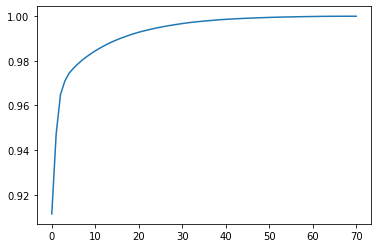

In [123]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))